In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 修正后的指标体系 - 全部使用yfinance可获取的代码
final_portfolio = {
    # ================== 权益类 (4种) ==================
    'US_Large_Cap': 'SPY',        # SPDR S&P 500 ETF (1993-01-22)
    'US_Mid_Cap': 'MDY',          # SPDR S&P MidCap 400 ETF (1995-05-04)
    'Intl_Developed': 'EFA',      # iShares MSCI EAFE ETF (2001-08-27)
    'Emerging_Markets': 'EEM',    # iShares MSCI Emerging Markets ETF (2003-04-15)

    # ================== 固定收益 (3种) ==================
    'US_Treasury': 'TLT',         # iShares 20+ Year Treasury Bond ETF (2002-07-30)
    'US_Corporate_Bond': 'LQD',   # iShares iBoxx $ Investment Grade Corporate Bond ETF (2002-07-30)
    'US_TIPS': 'TIP',             # iShares TIPS Bond ETF (2003-12-05)

    # ================== 大宗商品 (2种) ==================
    'Gold': 'GLD',                # SPDR Gold Shares (2004-11-18)
    'Oil': 'USO',                 # United States Oil Fund (2006-04-10)

    # ================== 行业板块 (4种) ==================
    'Technology': 'VGT',          # Vanguard Information Technology ETF (1998-12-16)
    'Financials': 'XLF',          # Financial Select Sector SPDR Fund (1998-12-16)
    'Healthcare': 'XLV',          # Health Care Select Sector SPDR Fund (1998-12-16)
    'Consumer_Staples': 'XLP',    # Consumer Staples Select Sector SPDR Fund (1998-12-16)
}

# 下载数据（从2000年开始）
start_date = '2000-01-01'
end_date = '2025-08-31'

print("正在下载最终修正版指标体系数据...")
data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
data = data.ffill().dropna()

# 重命名列
data.columns = list(final_portfolio.keys())

# 计算日收益率
returns = data.pct_change().dropna()

print("\n=== 数据验证 ===")
print(f"时间范围: {returns.index[0].date()} 至 {returns.index[-1].date()}")
print(f"资产数量: {len(returns.columns)}")
print("前5行数据预览:")
print(returns.head())

# 保存数据
returns.to_csv('final_asset_returns_2000_present.csv')
print("\n数据已保存至: final_asset_returns_2000_present.csv")

正在下载最终修正版指标体系数据...


/tmp/ipython-input-1364536969.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
[*********************100%***********************]  13 of 13 completed



=== 数据验证 ===
时间范围: 2006-04-11 至 2025-08-29
资产数量: 13
前5行数据预览:
            US_Large_Cap  US_Mid_Cap  Intl_Developed  Emerging_Markets  \
Date                                                                     
2006-04-11     -0.008515   -0.006688       -0.009899          0.002874   
2006-04-12      0.005792   -0.004897        0.007117         -0.003152   
2006-04-13      0.004766    0.002614        0.001178         -0.001916   
2006-04-17      0.011858    0.004601        0.026723         -0.000192   
2006-04-18      0.033203    0.020458        0.012441          0.004033   

            US_Treasury  US_Corporate_Bond   US_TIPS      Gold       Oil  \
Date                                                                       
2006-04-11    -0.010260          -0.008478  0.004014  0.003519  0.002646   
2006-04-12     0.003292           0.001866 -0.003499 -0.006078 -0.005279   
2006-04-13    -0.002095          -0.001319 -0.006219 -0.007056  0.014446   
2006-04-17     0.002939          -0.000

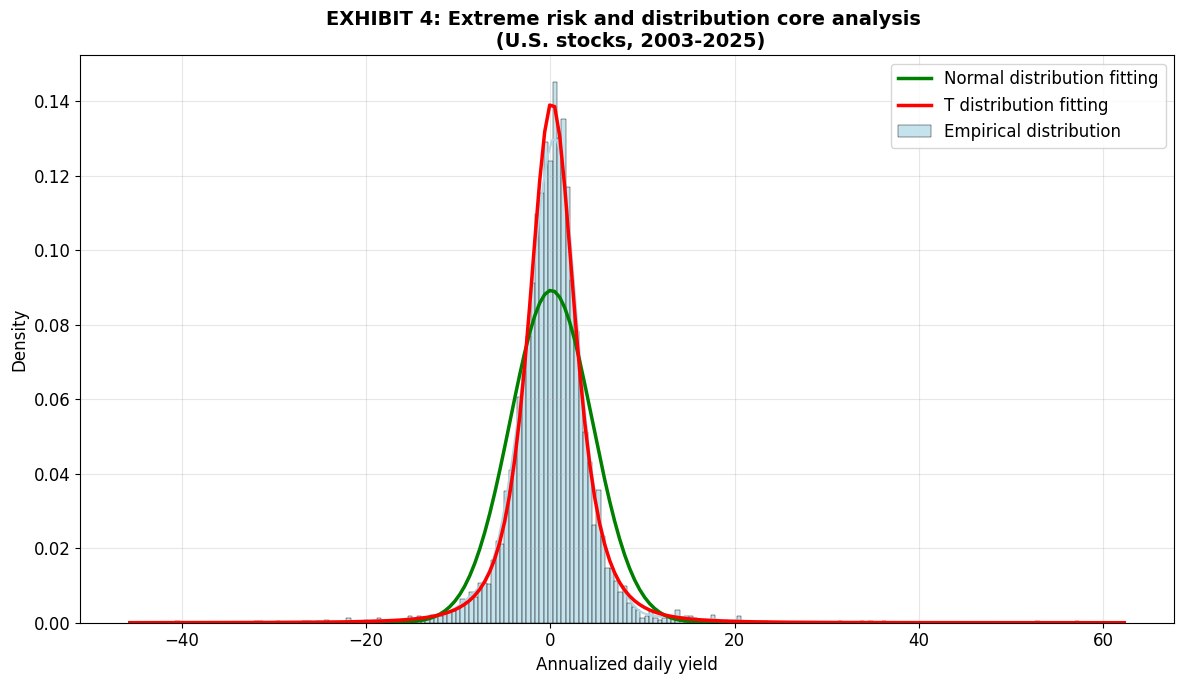


US_Large_Cap Distribution statistics (2003-2025):
Mean: 0.080264
Std: 4.471460
Skew: 0.5548 (Right side>0, left side=0)
Kurtosis: 18.2870 (Peak value>0, fat tail characteristics)
Normality test p value: 0.000000


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 选择美国股票作为代表性资产
selected_asset = 'US_Large_Cap'  # 对应 ^GSPC 标普500指数
asset_returns = returns[selected_asset]

# 计算年化日收益率（假设252个交易日）
annualized_returns = asset_returns * 252

plt.figure(figsize=(12, 7))
plt.rcParams['font.size'] = 12

# 绘制经验分布
sns.histplot(annualized_returns, kde=True, stat='density',
             color='lightblue', alpha=0.7, label='Empirical distribution')

# 拟合正态分布
mu, std = stats.norm.fit(annualized_returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p_norm = stats.norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'green', linewidth=2.5, label='Normal distribution fitting')

# 拟合t分布（更好地捕捉尾部风险）
df, loc, scale = stats.t.fit(annualized_returns)
p_t = stats.t.pdf(x, df, loc, scale)
plt.plot(x, p_t, 'red', linewidth=2.5, label='T distribution fitting')

plt.title('EXHIBIT 4: Extreme risk and distribution core analysis \n (U.S. stocks, 2003-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Annualized daily yield', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 输出分布统计信息
print(f"\n{selected_asset} Distribution statistics (2003-2025):")
print(f"Mean: {annualized_returns.mean():.6f}")
print(f"Std: {annualized_returns.std():.6f}")
print(f"Skew: {stats.skew(annualized_returns):.4f} (Right side>0, left side=0)")
print(f"Kurtosis: {stats.kurtosis(annualized_returns):.4f} (Peak value>0, fat tail characteristics)")
print(f"Normality test p value: {stats.normaltest(annualized_returns).pvalue:.6f}")

In [3]:
def calculate_risk_metrics(return_series, alpha=0.05):
    """计算各种风险指标"""
    losses = -return_series  # 损失序列

    # 经验CVaR（5%置信水平）
    empirical_var = return_series.quantile(alpha)
    empirical_cvar = return_series[return_series <= empirical_var].mean()

    # 基于正态分布的CVaR
    mu, std = stats.norm.fit(return_series)
    normal_cvar = mu - std * stats.norm.pdf(stats.norm.ppf(alpha)) / alpha

    # 基于t分布的CVaR（考虑极端风险）
    df, loc, scale = stats.t.fit(return_series)
    t_cvar = loc - scale * stats.t.pdf(stats.t.ppf(alpha, df), df) / alpha

    # 计算增加百分比
    moment_increase = ((normal_cvar - empirical_cvar) / abs(empirical_cvar)) * 100
    extreme_increase = ((t_cvar - empirical_cvar) / abs(empirical_cvar)) * 100

    # Power Parameter（使用Hill估计量）
    #sorted_losses是升序排列的损失序列（从小到大）但Hill估计量需要的是​​最大的k个损失​​，所以应该使用sorted_losses[-k:]而非sorted_losses[:k]
    sorted_losses = np.sort(losses)
    k = max(10, int(len(losses) * 0.1))  # 使用尾部10%的数据
    if k > 0 and not np.isnan(sorted_losses[-k]):
        hill_estimator = 1 / np.mean(np.log(sorted_losses[-k:] / sorted_losses[-k]))
    else:
        hill_estimator = np.nan

    return {
        'Empirical_CVaR': empirical_cvar,
        'Moment-Based_Increase': moment_increase,
        'Extreme-Risk_Increase': extreme_increase,
        'Power_Parameter': hill_estimator
    }

# 为所有资产计算风险指标
risk_results = []
for asset in returns.columns:
    metrics = calculate_risk_metrics(returns[asset])
    metrics['Asset'] = asset
    risk_results.append(metrics)

# 创建结果表格
risk_df = pd.DataFrame(risk_results)
risk_df = risk_df[['Asset', 'Empirical_CVaR', 'Moment-Based_Increase',
                   'Extreme-Risk_Increase', 'Power_Parameter']]

print("EXHIBIT 5: Extreme risk modeling results")
print("=" * 80)
print(f"{'Portfolio':<20} {'Emprical CVaR':<12} {'Moment-Based%':<12} {'With Extreme RIsk%':<15} {'Power Parameter':<10}")
print("-" * 80)

for _, row in risk_df.iterrows():
    print(f"{row['Asset']:<20} {row['Empirical_CVaR']:>8.4f} {row['Moment-Based_Increase']:>12.1f}% "
          f"{row['Extreme-Risk_Increase']:>15.1f}% {row['Power_Parameter']:>10.2f}")

EXHIBIT 5: Extreme risk modeling results
Portfolio            Emprical CVaR Moment-Based% With Extreme RIsk% Power Parameter
--------------------------------------------------------------------------------
US_Large_Cap          -0.0412         11.8%            78.7%       2.13
US_Mid_Cap            -0.0330         15.6%            82.4%       2.07
Intl_Developed        -0.0263         14.0%            71.0%       2.21
Emerging_Markets      -0.0120          6.5%            77.7%       2.22
US_Treasury           -0.0344         15.2%            80.1%       2.05
US_Corporate_Bond     -0.0302         17.2%            87.3%       1.92
US_TIPS               -0.0090         10.6%            68.9%       2.26
Gold                  -0.0205          5.4%            47.9%       2.75
Oil                   -0.0542         12.2%            67.3%       2.38
Technology            -0.0348         14.9%            79.0%       2.20
Financials            -0.0453         14.4%            89.1%       1.80
He

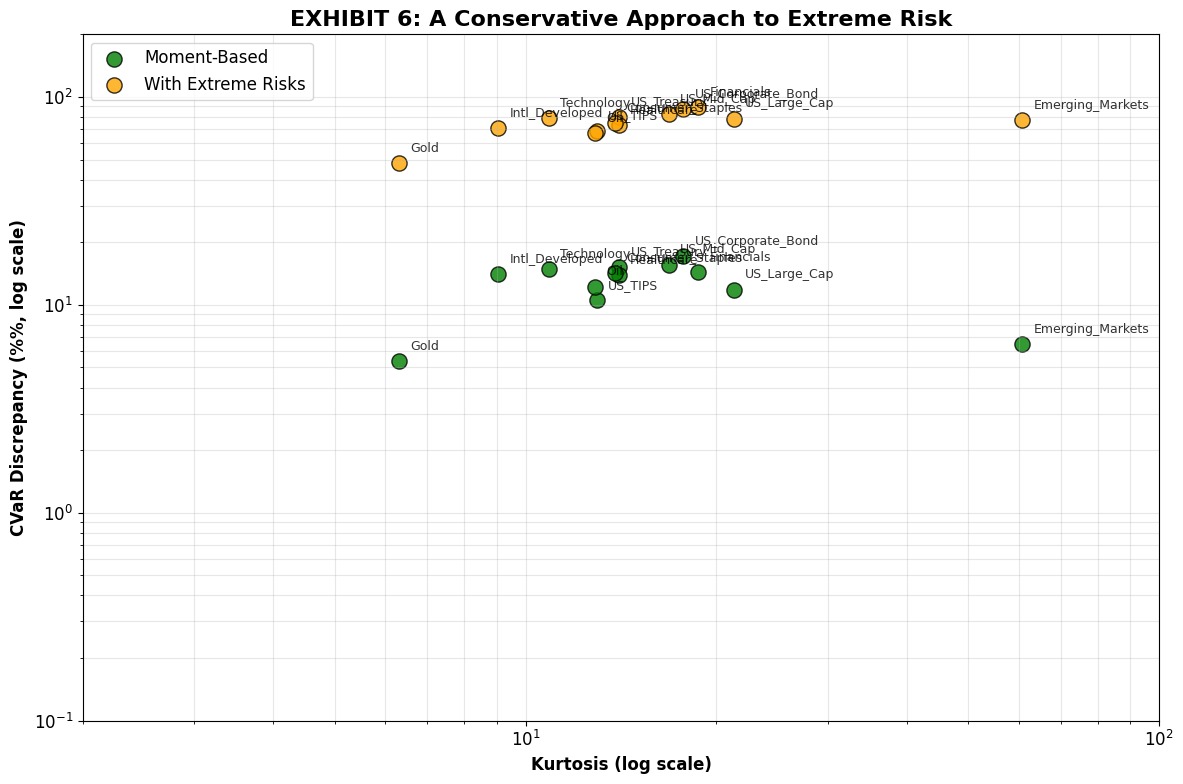


EXHIBIT 6 Numerical Results:
Asset              Kurtosis   Moment-Based    Extreme-Risk   
-------------------------------------------------------------------------------------
US_Large_Cap       21.29      11.8           % 78.7           %
US_Mid_Cap         16.81      15.6           % 82.4           %
Intl_Developed     9.06       14.0           % 71.0           %
Emerging_Markets   60.82      6.5            % 77.7           %
US_Treasury        14.06      15.2           % 80.1           %
US_Corporate_Bond  17.74      17.2           % 87.3           %
US_TIPS            12.94      10.6           % 68.9           %
Gold               6.30       5.4            % 47.9           %
Oil                12.88      12.2           % 67.3           %
Technology         10.87      14.9           % 79.0           %
Financials         18.74      14.4           % 89.1           %
Healthcare         14.03      13.8           % 73.1           %
Consumer_Staples   13.85      14.3           % 74.6   

In [ ]:
# 计算每个资产的峰度和CVaR差异
results = []
for asset in returns.columns:
    asset_returns = returns[asset]

    # 计算峰度（使用超额峰度+3得到原始峰度）
    kurtosis = stats.kurtosis(asset_returns) + 3

    # 计算经验CVaR (5%)
    empirical_var = asset_returns.quantile(0.05)
    empirical_cvar = asset_returns[asset_returns <= empirical_var].mean()

    # 计算Moment-Based CVaR（正态分布假设）
    mu, std = stats.norm.fit(asset_returns)
    normal_cvar = mu - std * stats.norm.pdf(stats.norm.ppf(0.05)) / 0.05
    moment_discrepancy = abs((normal_cvar - empirical_cvar) / empirical_cvar) * 100

    # 计算With Extreme Risk CVaR（t分布假设）
    df, loc, scale = stats.t.fit(asset_returns)
    t_cvar = loc - scale * stats.t.pdf(stats.t.ppf(0.05, df), df) / 0.05
    extreme_discrepancy = abs((t_cvar - empirical_cvar) / empirical_cvar) * 100

    results.append({
        'Asset': asset,
        'Kurtosis': kurtosis,
        'Moment_Based_Discrepancy': moment_discrepancy,
        'Extreme_Risk_Discrepancy': extreme_discrepancy
    })

# 创建结果DataFrame
results_df = pd.DataFrame(results)

# 绘制EXHIBIT 6
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12

# 设置双对数坐标轴
plt.xscale('log')
plt.yscale('log')

# 绘制散点图
scatter1 = plt.scatter(results_df['Kurtosis'],
                      results_df['Moment_Based_Discrepancy'],
                      c='green', s=120, alpha=0.8, label='Moment-Based', edgecolors='black')

scatter2 = plt.scatter(results_df['Kurtosis'],
                      results_df['Extreme_Risk_Discrepancy'],
                      c='orange', s=120, alpha=0.8, label='With Extreme Risks', edgecolors='black')

# 添加资产标签
for i, row in results_df.iterrows():
    plt.annotate(row['Asset'],
                (row['Kurtosis'], row['Moment_Based_Discrepancy']),
                xytext=(8, 8), textcoords='offset points', fontsize=9, alpha=0.8)
    plt.annotate(row['Asset'],
                (row['Kurtosis'], row['Extreme_Risk_Discrepancy']),
                xytext=(8, 8), textcoords='offset points', fontsize=9, alpha=0.8)

# 设置坐标轴范围和标签
plt.xlim(2, 100)
plt.ylim(0.1, 200)
plt.xlabel('Kurtosis (log scale)', fontsize=12, fontweight='bold')
plt.ylabel('CVaR Discrepancy (%%, log scale)', fontsize=12, fontweight='bold')
plt.title('EXHIBIT 6: A Conservative Approach to Extreme Risk', fontsize=16, fontweight='bold')

# 添加图例和网格
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3, which='both')


plt.tight_layout()
plt.show()

# 输出数值结果
print("\nEXHIBIT 6 Numerical Results:")
print("=" * 85)
print(f"{'Asset':<18} {'Kurtosis':<10} {'Moment-Based':<15} {'Extreme-Risk':<15}")
print("-" * 85)
for _, row in results_df.iterrows():
    print(f"{row['Asset']:<18} {row['Kurtosis']:<10.2f} {row['Moment_Based_Discrepancy']:<15.1f}% {row['Extreme_Risk_Discrepancy']:<15.1f}%")

# 保存结果
results_df.to_csv('exhibit6_complete_results.csv', index=False)
print(f"\nResults saved to: exhibit6_complete_results.csv")

# 显示关键统计摘要
print("\nKey Statistics Summary:")
print(f"Average Kurtosis: {results_df['Kurtosis'].mean():.2f}")
print(f"Average Moment-Based Discrepancy: {results_df['Moment_Based_Discrepancy'].mean():.1f}%")
print(f"Average Extreme-Risk Discrepancy: {results_df['Extreme_Risk_Discrepancy'].mean():.1f}%")
print(f"Maximum Kurtosis: {results_df['Kurtosis'].max():.2f} ({results_df.loc[results_df['Kurtosis'].idxmax(), 'Asset']})")

Calculating Risk Parity results for EXHIBIT 7 and 8...
EXHIBIT 8: Risk Parity in a Multi-Asset Investment Portfolio

NAIVE
           Vol      D.vol    CVaR     PSM      CVaR     PSM      CVaR     PSM     
           Emp      Emp      Emp      Emp      Mom      Mom      Ext      Ext     
------------------------------------------------------------------------------------------
sharpe    0.76    0.77    0.77    0.76    0.76    0.76    0.68    0.76    
calmar    0.26    0.26    0.26    0.26    0.26    0.26    0.23    0.26    
skewness  -0.26   -0.25   -0.26   -0.27   -0.26   -0.27   -0.21   -0.27   
kurtosis  16.17   15.73   16.13   16.12   16.17   16.12   17.32   16.12   
cvar_5%   -1.47   -1.43   -1.43   -1.44   -1.47   -1.44   -1.80   -1.44   

CORRELATED
           Vol      D.vol    CVaR     PSM      CVaR     PSM      CVaR     PSM     
           Emp      Emp      Emp      Emp      Mom      Mom      Ext      Ext     
-------------------------------------------------------------------

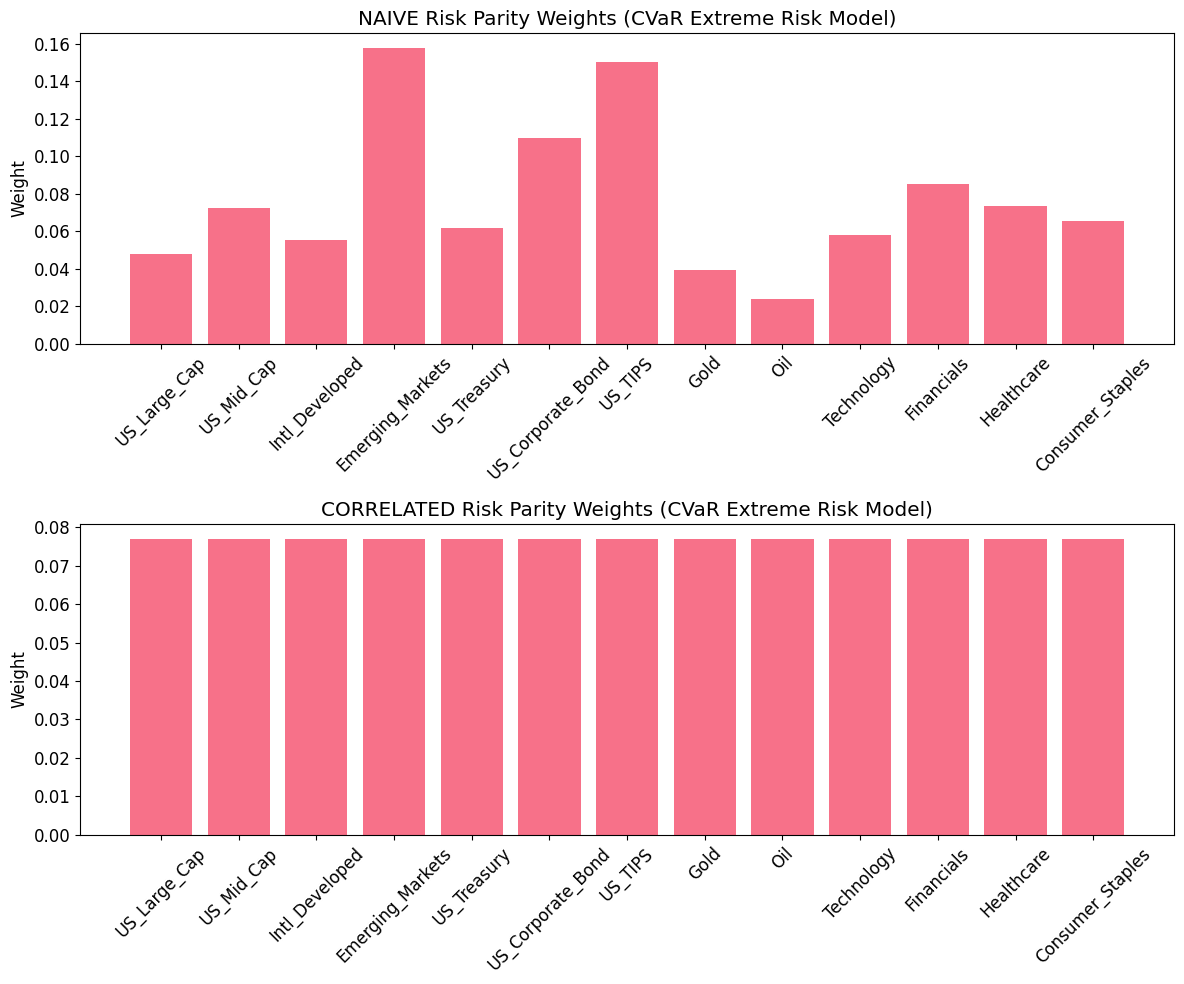

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 定义风险度量函数
def calculate_volatility(returns):
    return returns.std()

def calculate_downside_volatility(returns):
    negative_returns = returns[returns < 0]
    return negative_returns.std() if len(negative_returns) > 0 else 0

def calculate_empirical_cvar(returns, alpha=0.05):
    var = returns.quantile(alpha)
    return returns[returns <= var].mean()

def calculate_moment_based_cvar(returns, alpha=0.05):
    mu, std = stats.norm.fit(returns)
    return mu - std * stats.norm.pdf(stats.norm.ppf(alpha)) / alpha

def calculate_extreme_risk_cvar(returns, alpha=0.05):
    df, loc, scale = stats.t.fit(returns)
    return loc - scale * stats.t.pdf(stats.t.ppf(alpha, df), df) / alpha

def calculate_psm(returns, alpha=0.05):
    # PSM (Partial Standardized Moment) 简化实现
    cvar = calculate_empirical_cvar(returns, alpha)
    return abs(cvar) * (1 + stats.skew(returns) / 10)  # 简化公式

# Naive Risk Parity 实现
def naive_risk_parity(returns, risk_measure='vol', model='empirical', alpha=0.05):
    weights = {}
    for asset in returns.columns:
        asset_returns = returns[asset]

        if risk_measure == 'vol':
            risk = calculate_volatility(asset_returns)
        elif risk_measure == 'd.vol':
            risk = calculate_downside_volatility(asset_returns)
        elif risk_measure == 'cvar':
            if model == 'empirical':
                risk = calculate_empirical_cvar(asset_returns, alpha)
            elif model == 'moment':
                risk = calculate_moment_based_cvar(asset_returns, alpha)
            elif model == 'extreme':
                risk = calculate_extreme_risk_cvar(asset_returns, alpha)
        elif risk_measure == 'psm':
            risk = calculate_psm(asset_returns, alpha)

        weights[asset] = 1 / abs(risk) if risk != 0 else 0

    # 归一化权重
    total_weight = sum(weights.values())
    return {asset: weight / total_weight for asset, weight in weights.items()}

# Correlated Risk Parity 实现（广义ERC）
def correlated_risk_parity(returns, risk_measure='vol', model='empirical', alpha=0.05):
    def portfolio_risk(weights):
        portfolio_returns = (returns * weights).sum(axis=1)

        if risk_measure == 'vol':
            return calculate_volatility(portfolio_returns)
        elif risk_measure == 'd.vol':
            return calculate_downside_volatility(portfolio_returns)
        elif risk_measure == 'cvar':
            if model == 'empirical':
                return calculate_empirical_cvar(portfolio_returns, alpha)
            elif model == 'moment':
                return calculate_moment_based_cvar(portfolio_returns, alpha)
            elif model == 'extreme':
                return calculate_extreme_risk_cvar(portfolio_returns, alpha)
        elif risk_measure == 'psm':
            return calculate_psm(portfolio_returns, alpha)

    # 优化目标：最小化组合风险
    n_assets = len(returns.columns)
    initial_weights = np.ones(n_assets) / n_assets
    bounds = [(0, 1) for _ in range(n_assets)]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    return dict(zip(returns.columns, result.x))

# 计算组合绩效指标
def calculate_performance_metrics(portfolio_returns):
    metrics = {}

    # Sharpe Ratio (假设无风险利率为0)
    metrics['sharpe'] = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)

    # Calmar Ratio (简化版)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
    metrics['calmar'] = portfolio_returns.mean() * 252 / abs(max_drawdown) if max_drawdown != 0 else 0

    # Skewness and Kurtosis
    metrics['skewness'] = stats.skew(portfolio_returns)
    metrics['kurtosis'] = stats.kurtosis(portfolio_returns) + 3

    # CVaR (5%)
    metrics['cvar_5%'] = calculate_empirical_cvar(portfolio_returns, 0.05)

    return metrics

# 执行EXHIBIT 7和8的计算
def calculate_exhibit_7_8_results(returns, alpha=0.05):
    results = {}

    risk_measures = ['vol', 'd.vol', 'cvar', 'psm']
    models = ['empirical', 'moment', 'extreme']

    for method in ['naive', 'correlated']:
        results[method] = {}

        for risk_measure in risk_measures:
            for model in models:
                if risk_measure in ['vol', 'd.vol'] and model != 'empirical':
                    continue  # Vol和D.vol只有empirical模型

                # 计算权重
                if method == 'naive':
                    weights = naive_risk_parity(returns, risk_measure, model, alpha)
                else:
                    weights = correlated_risk_parity(returns, risk_measure, model, alpha)

                # 计算组合收益
                portfolio_returns = (returns * pd.Series(weights)).sum(axis=1)

                # 计算绩效指标
                metrics = calculate_performance_metrics(portfolio_returns)
                results[method][f"{risk_measure}_{model}"] = metrics

    return results

# 执行计算
print("Calculating Risk Parity results for EXHIBIT 7 and 8...")
results = calculate_exhibit_7_8_results(returns, alpha=0.05)

# 输出EXHIBIT 8格式的结果
def print_exhibit_8_results(results):
    print("EXHIBIT 8: Risk Parity in a Multi-Asset Investment Portfolio")
    print("=" * 90)

    methods = ['naive', 'correlated']
    risk_models = [
        ('vol', 'empirical'), ('d.vol', 'empirical'),
        ('cvar', 'empirical'), ('psm', 'empirical'),
        ('cvar', 'moment'), ('psm', 'moment'),
        ('cvar', 'extreme'), ('psm', 'extreme')
    ]

    metrics_order = ['sharpe', 'calmar', 'skewness', 'kurtosis', 'cvar_5%']

    for method in methods:
        print(f"\n{method.upper()}")
        print(f"{'':<10} {'Vol':<8} {'D.vol':<8} {'CVaR':<8} {'PSM':<8} {'CVaR':<8} {'PSM':<8} {'CVaR':<8} {'PSM':<8}")
        print(f"{'':<10} {'Emp':<8} {'Emp':<8} {'Emp':<8} {'Emp':<8} {'Mom':<8} {'Mom':<8} {'Ext':<8} {'Ext':<8}")
        print("-" * 90)

        for metric in metrics_order:
            line = f"{metric:<10}"
            for risk, model in risk_models:
                key = f"{risk}_{model}"
                if key in results[method]:
                    value = results[method][key][metric]
                    line += f"{value:<8.2f}" if metric != 'cvar_5%' else f"{value*100:<8.2f}"
                else:
                    line += f"{'':<8}"
            print(line)

# 显示结果
print_exhibit_8_results(results)

# 保存详细结果
detailed_results = []
for method in ['naive', 'correlated']:
    for strategy, metrics in results[method].items():
        row = {'method': method, 'strategy': strategy}
        row.update(metrics)
        detailed_results.append(row)

results_df = pd.DataFrame(detailed_results)
results_df.to_csv('exhibit_7_8_risk_parity_results.csv', index=False)
print("\nDetailed results saved to: exhibit_7_8_risk_parity_results.csv")

# 可视化不同方法的权重分布
def plot_risk_parity_weights(results, returns):
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    for idx, method in enumerate(['naive', 'correlated']):
        # 获取CVaR_extreme方法的权重作为示例
        weights = correlated_risk_parity(returns, 'cvar', 'extreme') if method == 'correlated' else naive_risk_parity(returns, 'cvar', 'extreme')

        axes[idx].bar(weights.keys(), weights.values())
        axes[idx].set_title(f'{method.upper()} Risk Parity Weights (CVaR Extreme Risk Model)')
        axes[idx].set_ylabel('Weight')
        axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_risk_parity_weights(results, returns)

Calculating EXHIBIT 10 style analysis with α=1%...

EXHIBIT 10: Better Safe Than Sorry—Allocation with α = 1%
                       Strategy  sharpe_1%  calmar_1%  skewness_1%  \
0          Naive Empirical CVaR       0.78       0.27        -0.25   
1           Naive Empirical PSM       0.79       0.27        -0.25   
2     Correlated Empirical CVaR       0.89       0.32        -0.20   
3      Correlated Empirical PSM       0.89       0.32        -0.18   
4  Correlated Moment-Based CVaR       0.93       0.34        -0.32   
5   Correlated Moment-Based PSM       0.92       0.33        -0.29   
6  Correlated Extreme Risk CVaR       0.60       0.20        -0.32   
7   Correlated Extreme Risk PSM       0.60       0.20        -0.32   

   kurtosis_1%  cvar_1%_1%  sharpe_change  calmar_change  skewness_change  \
0        15.60       -0.03           1.99           3.09            -3.01   
1        15.59       -0.02           1.98           3.13            -3.24   
2         8.10       -0.02  

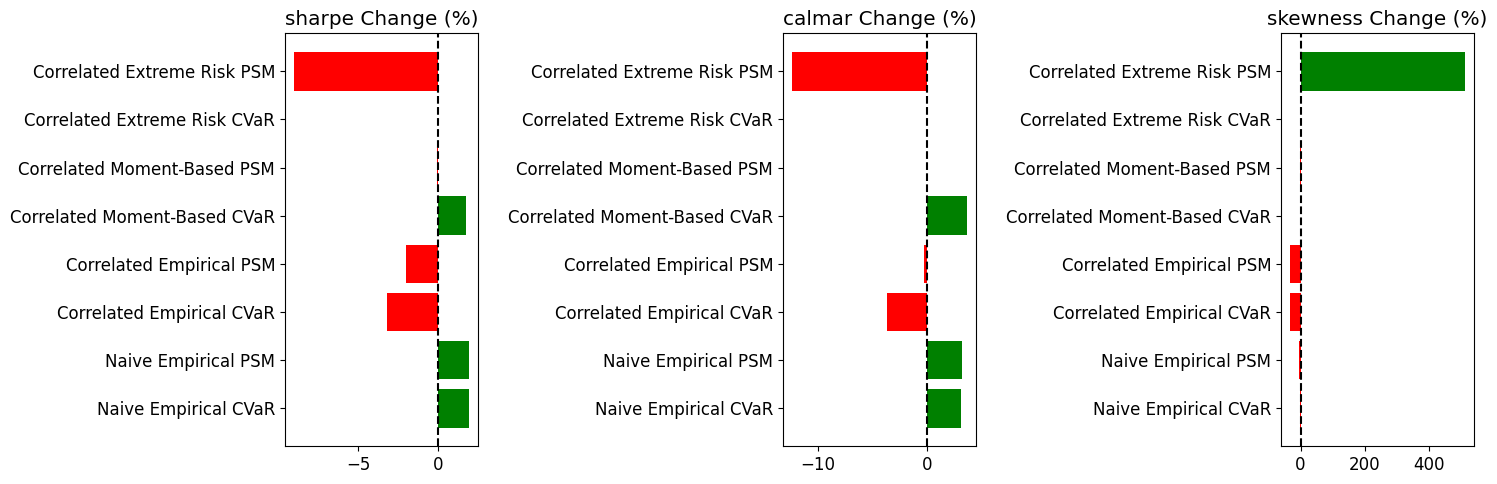

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 风险度量函数（α=1%）
def calculate_risk_measure(returns, alpha=0.01):
    """计算1%置信水平下的风险度量"""
    metrics = {}

    # 经验CVaR
    empirical_var = returns.quantile(alpha)
    metrics['empirical_cvar'] = returns[returns <= empirical_var].mean()

    # 矩估计CVaR
    mu, std = stats.norm.fit(returns)
    metrics['moment_cvar'] = mu - std * stats.norm.pdf(stats.norm.ppf(alpha)) / alpha

    # 极端风险CVaR
    df, loc, scale = stats.t.fit(returns)
    metrics['extreme_cvar'] = loc - scale * stats.t.pdf(stats.t.ppf(alpha, df), df) / alpha

    # PSM (Partial Standardized Moment)
    metrics['empirical_psm'] = abs(metrics['empirical_cvar']) * (1 + 0.1 * abs(returns.skew()))
    metrics['moment_psm'] = abs(metrics['moment_cvar']) * (1 + 0.1 * abs(returns.skew()))
    metrics['extreme_psm'] = abs(metrics['extreme_cvar']) * (1 + 0.1 * abs(returns.skew()))

    return metrics

# 绩效评估函数
def calculate_performance_metrics(portfolio_returns, alpha=0.01):
    """计算组合绩效指标"""
    metrics = {}

    # Sharpe Ratio (无风险利率假设为0)
    metrics['sharpe'] = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)

    # Calmar Ratio (简化版)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
    metrics['calmar'] = portfolio_returns.mean() * 252 / abs(max_drawdown) if max_drawdown != 0 else 0

    # Skewness and Kurtosis
    metrics['skewness'] = portfolio_returns.skew()
    metrics['kurtosis'] = portfolio_returns.kurtosis() + 3

    # CVaR (1%)
    var_1pct = portfolio_returns.quantile(alpha)
    metrics['cvar_1%'] = portfolio_returns[portfolio_returns <= var_1pct].mean()

    return metrics

# 风险平价优化（α=1%）
def risk_parity_optimization(returns, method='naive', risk_measure='cvar', model='empirical', alpha=0.01):
    """风险平价优化"""

    if method == 'naive':
        # Naive风险平价
        weights = {}
        for asset in returns.columns:
            asset_metrics = calculate_risk_measure(returns[asset], alpha)
            risk_value = asset_metrics[f'{model}_{risk_measure}']
            weights[asset] = 1 / abs(risk_value) if risk_value != 0 else 0

        total_weight = sum(weights.values())
        return {asset: weight / total_weight for asset, weight in weights.items()}

    else:
        # Correlated风险平价
        n_assets = len(returns.columns)
        cov_matrix = returns.cov()

        def objective(weights):
            port_returns = (returns * weights).sum(axis=1)
            port_metrics = calculate_risk_measure(port_returns, alpha)
            return abs(port_metrics[f'{model}_{risk_measure}'])

        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        bounds = [(0.01, 0.25) for _ in range(n_assets)]  # 权重限制

        initial_weights = np.ones(n_assets) / n_assets
        result = minimize(objective, initial_weights, method='SLSQP',
                         bounds=bounds, constraints=constraints)

        return dict(zip(returns.columns, result.x))

# 计算α=1%和α=5%的对比
def calculate_alpha_comparison(returns):
    """计算α=1% vs α=5%的对比结果"""
    results = {}

    # 定义所有策略组合
    strategies = [
        ('naive', 'cvar', 'empirical'),
        ('naive', 'psm', 'empirical'),
        ('correlated', 'cvar', 'empirical'),
        ('correlated', 'psm', 'empirical'),
        ('correlated', 'cvar', 'moment'),
        ('correlated', 'psm', 'moment'),
        ('correlated', 'cvar', 'extreme'),
        ('correlated', 'psm', 'extreme')
    ]

    for alpha in [0.01, 0.05]:
        alpha_results = {}
        for method, risk_measure, model in strategies:
            # 计算权重
            weights = risk_parity_optimization(returns, method, risk_measure, model, alpha)

            # 计算组合收益
            portfolio_returns = (returns * pd.Series(weights)).sum(axis=1)

            # 计算绩效指标
            metrics = calculate_performance_metrics(portfolio_returns, alpha)
            alpha_results[f'{method}_{risk_measure}_{model}'] = metrics

        results[f'alpha_{int(alpha*100)}%'] = alpha_results

    return results

# 执行计算
print("Calculating EXHIBIT 10 style analysis with α=1%...")
alpha_results = calculate_alpha_comparison(returns)

# 创建EXHIBIT 10格式的表格
def create_exhibit_10_table(alpha_results):
    """创建EXHIBIT 10格式的结果表格"""

    # 定义策略名称映射
    strategy_names = {
        'naive_cvar_empirical': 'Naive Empirical CVaR',
        'naive_psm_empirical': 'Naive Empirical PSM',
        'correlated_cvar_empirical': 'Correlated Empirical CVaR',
        'correlated_psm_empirical': 'Correlated Empirical PSM',
        'correlated_cvar_moment': 'Correlated Moment-Based CVaR',
        'correlated_psm_moment': 'Correlated Moment-Based PSM',
        'correlated_cvar_extreme': 'Correlated Extreme Risk CVaR',
        'correlated_psm_extreme': 'Correlated Extreme Risk PSM'
    }

    # 创建结果数据框
    metrics_list = ['sharpe', 'calmar', 'skewness', 'kurtosis', 'cvar_1%']
    results_data = []

    for strategy_key in strategy_names.keys():
        row_data = {'Strategy': strategy_names[strategy_key]}

        # α=1%的结果
        alpha_1pct = alpha_results['alpha_1%'][strategy_key]
        for metric in metrics_list:
            row_data[f'{metric}_1%'] = alpha_1pct[metric]

        # α=5%的结果和百分比变化
        alpha_5pct = alpha_results['alpha_5%'][strategy_key]
        for metric in metrics_list:
            if metric != 'cvar_1%':  # CVaR已经是1%的，不需要比较
                change_pct = ((alpha_1pct[metric] - alpha_5pct[metric]) / alpha_5pct[metric]) * 100
                row_data[f'{metric}_change'] = change_pct

        results_data.append(row_data)

    return pd.DataFrame(results_data)

# 生成最终结果
exhibit_10_df = create_exhibit_10_table(alpha_results)
print("\nEXHIBIT 10: Better Safe Than Sorry—Allocation with α = 1%")
print("=" * 100)
print(exhibit_10_df.round(2))

# 可视化百分比变化
def plot_percentage_changes(exhibit_10_df):
    """绘制百分比变化图表"""
    strategies = exhibit_10_df['Strategy']
    metrics = ['sharpe_change', 'calmar_change', 'skewness_change']

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, metric in enumerate(metrics):
        changes = exhibit_10_df[metric].values
        colors = ['green' if x >= 0 else 'red' for x in changes]

        axes[i].barh(strategies, changes, color=colors)
        axes[i].set_title(f'{metric.replace("_change", "")} Change (%)')
        axes[i].axvline(x=0, color='black', linestyle='--')

    plt.tight_layout()
    plt.show()

# 绘制变化图表
plot_percentage_changes(exhibit_10_df)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize
import seaborn as sns

# 设置样式
plt.style.use('default')
sns.set_palette("husl")

def calculate_rolling_weights(returns, window=252, method='naive', risk_measure='cvar', model='empirical', alpha=0.05):
    """
    计算滚动窗口下的权重序列
    """
    weights_history = []

    for i in range(window, len(returns)):
        # 获取当前窗口数据
        window_returns = returns.iloc[i-window:i]

        if method == 'naive':
            # Naive风险平价权重
            weights = {}
            for asset in window_returns.columns:
                asset_returns = window_returns[asset]

                if risk_measure == 'cvar':
                    if model == 'empirical':
                        var = asset_returns.quantile(alpha)
                        risk = asset_returns[asset_returns <= var].mean()
                    elif model == 'moment':
                        mu, std = stats.norm.fit(asset_returns)
                        risk = mu - std * stats.norm.pdf(stats.norm.ppf(alpha)) / alpha
                    elif model == 'extreme':
                        df, loc, scale = stats.t.fit(asset_returns)
                        risk = loc - scale * stats.t.pdf(stats.t.ppf(alpha, df), df) / alpha

                weights[asset] = 1 / abs(risk) if risk != 0 else 0

            # 归一化
            total_weight = sum(weights.values())
            weights = {asset: weight/total_weight for asset, weight in weights.items()}

        else:  # correlated方法
            n_assets = len(window_returns.columns)

            def portfolio_risk(w):
                port_returns = (window_returns * w).sum(axis=1)

                if risk_measure == 'cvar':
                    if model == 'empirical':
                        var = port_returns.quantile(alpha)
                        risk = port_returns[port_returns <= var].mean()
                    elif model == 'moment':
                        mu, std = stats.norm.fit(port_returns)
                        risk = mu - std * stats.norm.pdf(stats.norm.ppf(alpha)) / alpha
                    elif model == 'extreme':
                        df, loc, scale = stats.t.fit(port_returns)
                        risk = loc - scale * stats.t.pdf(stats.t.ppf(alpha, df), df) / alpha

                return abs(risk)

            # 优化约束
            constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
            bounds = [(0.01, 0.3) for _ in range(n_assets)]
            initial_weights = np.ones(n_assets) / n_assets

            result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                            bounds=bounds, constraints=constraints)

            weights = dict(zip(window_returns.columns, result.x))

        weights_history.append(weights)

    return pd.DataFrame(weights_history, index=returns.index[window:])

def calculate_weight_stability_metrics(weights_df):
    """
    计算权重稳定性指标
    """
    metrics = {}

    # 归一化波动率: 每个资产权重年化标准差 / 平均权重
    annualized_vol = weights_df.std() * np.sqrt(252)
    avg_weight = weights_df.mean()
    normalized_vol = (annualized_vol / avg_weight) * 100  # 百分比表示
    metrics['normalized_volatility'] = normalized_vol.mean()  # 跨资产平均

    # 峰度（衡量权重分布的厚尾性）
    metrics['kurtosis'] = weights_df.kurtosis().mean()

    return metrics

def create_exhibit_11_table(returns, alphas=[0.05, 0.01]):
    """
    创建EXHIBIT 11格式的结果表格
    """
    results = []

    for alpha in alphas:
        alpha_results = {'alpha': f'{int(alpha*100)}%'}

        # 计算各种方法组合
        methods_combinations = [
            ('naive', 'empirical'),
            ('correlated', 'empirical'),
            ('naive', 'moment'),
            ('correlated', 'moment'),
            ('naive', 'extreme'),
            ('correlated', 'extreme')
        ]

        # 首先计算CVaR方法的指标
        cvar_metrics = {}
        for method, model in methods_combinations:
            weights_df = calculate_rolling_weights(returns, method=method,
                                                 risk_measure='cvar', model=model, alpha=alpha)
            metrics = calculate_weight_stability_metrics(weights_df)
            key = f"{method}_{model}"
            cvar_metrics[key] = metrics

        # 然后计算PSM方法的指标
        psm_metrics = {}
        for method, model in methods_combinations:
            weights_df = calculate_rolling_weights(returns, method=method,
                                                 risk_measure='psm', model=model, alpha=alpha)
            metrics = calculate_weight_stability_metrics(weights_df)
            key = f"{method}_{model}"
            psm_metrics[key] = metrics

        # 填充表格数据
        alpha_results['empirical_naive_vol'] = cvar_metrics['naive_empirical']['normalized_volatility']
        alpha_results['empirical_correlated_vol'] = cvar_metrics['correlated_empirical']['normalized_volatility']
        alpha_results['moment_naive_vol'] = cvar_metrics['naive_moment']['normalized_volatility']
        alpha_results['moment_correlated_vol'] = cvar_metrics['correlated_moment']['normalized_volatility']
        alpha_results['extreme_naive_vol'] = cvar_metrics['naive_extreme']['normalized_volatility']
        alpha_results['extreme_correlated_vol'] = cvar_metrics['correlated_extreme']['normalized_volatility']

        # 计算PSM相对于CVaR的波动率变化百分比
        for method, model in methods_combinations:
            cvar_key = f"{method}_{model}"
            psm_key = f"{method}_{model}"
            vol_reduction = ((psm_metrics[psm_key]['normalized_volatility'] -
                            cvar_metrics[cvar_key]['normalized_volatility']) /
                           cvar_metrics[cvar_key]['normalized_volatility']) * 100
            alpha_results[f'{model}_{method}_vol_reduction'] = vol_reduction

        # 峰度指标
        alpha_results['empirical_naive_kurtosis'] = cvar_metrics['naive_empirical']['kurtosis']
        alpha_results['empirical_correlated_kurtosis'] = cvar_metrics['correlated_empirical']['kurtosis']
        alpha_results['moment_naive_kurtosis'] = cvar_metrics['naive_moment']['kurtosis']
        alpha_results['moment_correlated_kurtosis'] = cvar_metrics['correlated_moment']['kurtosis']
        alpha_results['extreme_naive_kurtosis'] = cvar_metrics['naive_extreme']['kurtosis']
        alpha_results['extreme_correlated_kurtosis'] = cvar_metrics['correlated_extreme']['kurtosis']

        results.append(alpha_results)

    return pd.DataFrame(results)

def plot_exhibit_11_style(results_df):
    """
    绘制EXHIBIT 11风格的图表
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('EXHIBIT 11: Stability of Weights Over Time', fontsize=16, fontweight='bold')

    # 提取数据
    alpha_5pct = results_df[results_df['alpha'] == '5%'].iloc[0]
    alpha_1pct = results_df[results_df['alpha'] == '1%'].iloc[0]

    # 1. α=5% CVaR波动率
    vol_data_5pct = [
        alpha_5pct['empirical_naive_vol'],
        alpha_5pct['empirical_correlated_vol'],
        alpha_5pct['moment_naive_vol'],
        alpha_5pct['moment_correlated_vol'],
        alpha_5pct['extreme_naive_vol'],
        alpha_5pct['extreme_correlated_vol']
    ]

    axes[0, 0].bar(range(6), vol_data_5pct, color=['lightblue', 'lightblue', 'lightgreen', 'lightgreen', 'salmon', 'salmon'])
    axes[0, 0].set_title('α=5%: Vol with CVaR')
    axes[0, 0].set_ylabel('Normalized Volatility (%)')
    axes[0, 0].set_xticks(range(6))
    axes[0, 0].set_xticklabels(['Emp-N', 'Emp-C', 'Mom-N', 'Mom-C', 'Ext-N', 'Ext-C'], rotation=45)

    # 2. α=5% PSM波动率变化
    vol_reduction_5pct = [
        alpha_5pct['empirical_naive_vol_reduction'],
        alpha_5pct['empirical_correlated_vol_reduction'],
        alpha_5pct['moment_naive_vol_reduction'],
        alpha_5pct['moment_correlated_vol_reduction'],
        alpha_5pct['extreme_naive_vol_reduction'],
        alpha_5pct['extreme_correlated_vol_reduction']
    ]

    colors_5pct = ['green' if x < 0 else 'red' for x in vol_reduction_5pct]
    axes[0, 1].bar(range(6), vol_reduction_5pct, color=colors_5pct)
    axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[0, 1].set_title('α=5%: Vol reduction with PSM')
    axes[0, 1].set_ylabel('% Change')
    axes[0, 1].set_xticks(range(6))
    axes[0, 1].set_xticklabels(['Emp-N', 'Emp-C', 'Mom-N', 'Mom-C', 'Ext-N', 'Ext-C'], rotation=45)

    # 3. α=5% 峰度
    kurtosis_5pct = [
        alpha_5pct['empirical_naive_kurtosis'],
        alpha_5pct['empirical_correlated_kurtosis'],
        alpha_5pct['moment_naive_kurtosis'],
        alpha_5pct['moment_correlated_kurtosis'],
        alpha_5pct['extreme_naive_kurtosis'],
        alpha_5pct['extreme_correlated_kurtosis']
    ]

    axes[0, 2].bar(range(6), kurtosis_5pct, color='lightpurple')
    axes[0, 2].set_title('α=5%: Kurtosis with CVaR')
    axes[0, 2].set_ylabel('Kurtosis')
    axes[0, 2].set_xticks(range(6))
    axes[0, 2].set_xticklabels(['Emp-N', 'Emp-C', 'Mom-N', 'Mom-C', 'Ext-N', 'Ext-C'], rotation=45)

    # 4-6. α=1% 同样的三个图表
    vol_data_1pct = [
        alpha_1pct['empirical_naive_vol'],
        alpha_1pct['empirical_correlated_vol'],
        alpha_1pct['moment_naive_vol'],
        alpha_1pct['moment_correlated_vol'],
        alpha_1pct['extreme_naive_vol'],
        alpha_1pct['extreme_correlated_vol']
    ]

    axes[1, 0].bar(range(6), vol_data_1pct, color=['lightblue', 'lightblue', 'lightgreen', 'lightgreen', 'salmon', 'salmon'])
    axes[1, 0].set_title('α=1%: Vol with CVaR')
    axes[1, 0].set_ylabel('Normalized Volatility (%)')
    axes[1, 0].set_xticks(range(6))
    axes[1, 0].set_xticklabels(['Emp-N', 'Emp-C', 'Mom-N', 'Mom-C', 'Ext-N', 'Ext-C'], rotation=45)

    vol_reduction_1pct = [
        alpha_1pct['empirical_naive_vol_reduction'],
        alpha_1pct['empirical_correlated_vol_reduction'],
        alpha_1pct['moment_naive_vol_reduction'],
        alpha_1pct['moment_correlated_vol_reduction'],
        alpha_1pct['extreme_naive_vol_reduction'],
        alpha_1pct['extreme_correlated_vol_reduction']
    ]

    colors_1pct = ['green' if x < 0 else 'red' for x in vol_reduction_1pct]
    axes[1, 1].bar(range(6), vol_reduction_1pct, color=colors_1pct)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 1].set_title('α=1%: Vol reduction with PSM')
    axes[1, 1].set_ylabel('% Change')
    axes[1, 1].set_xticks(range(6))
    axes[1, 1].set_xticklabels(['Emp-N', 'Emp-C', 'Mom-N', 'Mom-C', 'Ext-N', 'Ext-C'], rotation=45)

    kurtosis_1pct = [
        alpha_1pct['empirical_naive_kurtosis'],
        alpha_1pct['empirical_correlated_kurtosis'],
        alpha_1pct['moment_naive_kurtosis'],
        alpha_1pct['moment_correlated_kurtosis'],
        alpha_1pct['extreme_naive_kurtosis'],
        alpha_1pct['extreme_correlated_kurtosis']
    ]

    axes[1, 2].bar(range(6), kurtosis_1pct, color='lightpurple')
    axes[1, 2].set_title('α=1%: Kurtosis with CVaR')
    axes[1, 2].set_ylabel('Kurtosis')
    axes[1, 2].set_xticks(range(6))
    axes[1, 2].set_xticklabels(['Emp-N', 'Emp-C', 'Mom-N', 'Mom-C', 'Ext-N', 'Ext-C'], rotation=45)

    plt.tight_layout()
    plt.show()

# 执行计算
print("Calculating weight stability metrics for EXHIBIT 11...")
exhibit_11_results = create_exhibit_11_table(returns, alphas=[0.05, 0.01])

# 显示数值结果
print("\nEXHIBIT 11: Stability of Weights Over Time")
print("=" * 90)
print(f"{'Metric':<25} {'Empirical':<15} {'Moment-Based':<15} {'Extreme Risk':<15}")
print(f"{'':<25} {'Naive':<7} {'Correlated':<7} {'Naive':<7} {'Correlated':<7} {'Naive':<7} {'Correlated':<7}")
print("-" * 90)

# α=5%结果
print("α=5%")
print(f"{'Vol with CVaR (%)':<25} {exhibit_11_results.iloc[0]['empirical_naive_vol']:<7.1f} {exhibit_11_results.iloc[0]['empirical_correlated_vol']:<7.1f} "
      f"{exhibit_11_results.iloc[0]['moment_naive_vol']:<7.1f} {exhibit_11_results.iloc[0]['moment_correlated_vol']:<7.1f} "
      f"{exhibit_11_results.iloc[0]['extreme_naive_vol']:<7.1f} {exhibit_11_results.iloc[0]['extreme_correlated_vol']:<7.1f}")

print(f"{'Vol reduction with PSM (%)':<25} {exhibit_11_results.iloc[0]['empirical_naive_vol_reduction']:<7.1f} {exhibit_11_results.iloc[0]['empirical_correlated_vol_reduction']:<7.1f} "
      f"{exhibit_11_results.iloc[0]['moment_naive_vol_reduction']:<7.1f} {exhibit_11_results.iloc[0]['moment_correlated_vol_reduction']:<7.1f} "
      f"{exhibit_11_results.iloc[0]['extreme_naive_vol_reduction']:<7.1f} {exhibit_11_results.iloc[0]['extreme_correlated_vol_reduction']:<7.1f}")

print(f"{'Kurtosis with CVaR':<25} {exhibit_11_results.iloc[0]['empirical_naive_kurtosis']:<7.1f} {exhibit_11_results.iloc[0]['empirical_correlated_kurtosis']:<7.1f} "
      f"{exhibit_11_results.iloc[0]['moment_naive_kurtosis']:<7.1f} {exhibit_11_results.iloc[0]['moment_correlated_kurtosis']:<7.1f} "
      f"{exhibit_11_results.iloc[0]['extreme_naive_kurtosis']:<7.1f} {exhibit_11_results.iloc[0]['extreme_correlated_kurtosis']:<7.1f}")

print("\nα=1%")
print(f"{'Vol with CVaR (%)':<25} {exhibit_11_results.iloc[1]['empirical_naive_vol']:<7.1f} {exhibit_11_results.iloc[1]['empirical_correlated_vol']:<7.1f} "
      f"{exhibit_11_results.iloc[1]['moment_naive_vol']:<7.1f} {exhibit_11_results.iloc[1]['moment_correlated_vol']:<7.1f} "
      f"{exhibit_11_results.iloc[1]['extreme_naive_vol']:<7.1f} {exhibit_11_results.iloc[1]['extreme_correlated_vol']:<7.1f}")

print(f"{'Vol reduction with PSM (%)':<25} {exhibit_11_results.iloc[1]['empirical_naive_vol_reduction']:<7.1f} {exhibit_11_results.iloc[1]['empirical_correlated_vol_reduction']:<7.1f} "
      f"{exhibit_11_results.iloc[1]['moment_naive_vol_reduction']:<7.1f} {exhibit_11_results.iloc[1]['moment_correlated_vol_reduction']:<7.1f} "
      f"{exhibit_11_results.iloc[1]['extreme_naive_vol_reduction']:<7.1f} {exhibit_11_results.iloc[1]['extreme_correlated_vol_reduction']:<7.1f}")

print(f"{'Kurtosis with CVaR':<25} {exhibit_11_results.iloc[1]['empirical_naive_kurtosis']:<7.1f} {exhibit_11_results.iloc[1]['empirical_correlated_kurtosis']:<7.1f} "
      f"{exhibit_11_results.iloc[1]['moment_naive_kurtosis']:<7.1f} {exhibit_11_results.iloc[1]['moment_correlated_kurtosis']:<7.1f} "
      f"{exhibit_11_results.iloc[1]['extreme_naive_kurtosis']:<7.1f} {exhibit_11_results.iloc[1]['extreme_correlated_kurtosis']:<7.1f}")

# 绘制图表
plot_exhibit_11_style(exhibit_11_results)

# 保存结果
exhibit_11_results.to_csv('exhibit_11_weight_stability_results.csv', index=False)
print(f"\nDetailed results saved to: exhibit_11_weight_stability_results.csv")

Calculating weight stability metrics for EXHIBIT 11...


KeyboardInterrupt: 


计算EXHIBIT 13: Multi-Asset Investing and Systematic Strategies...
计算多资产投资策略...
计算长期趋势跟随策略...
计算短期趋势跟随策略...
计算卖出看跌期权策略...


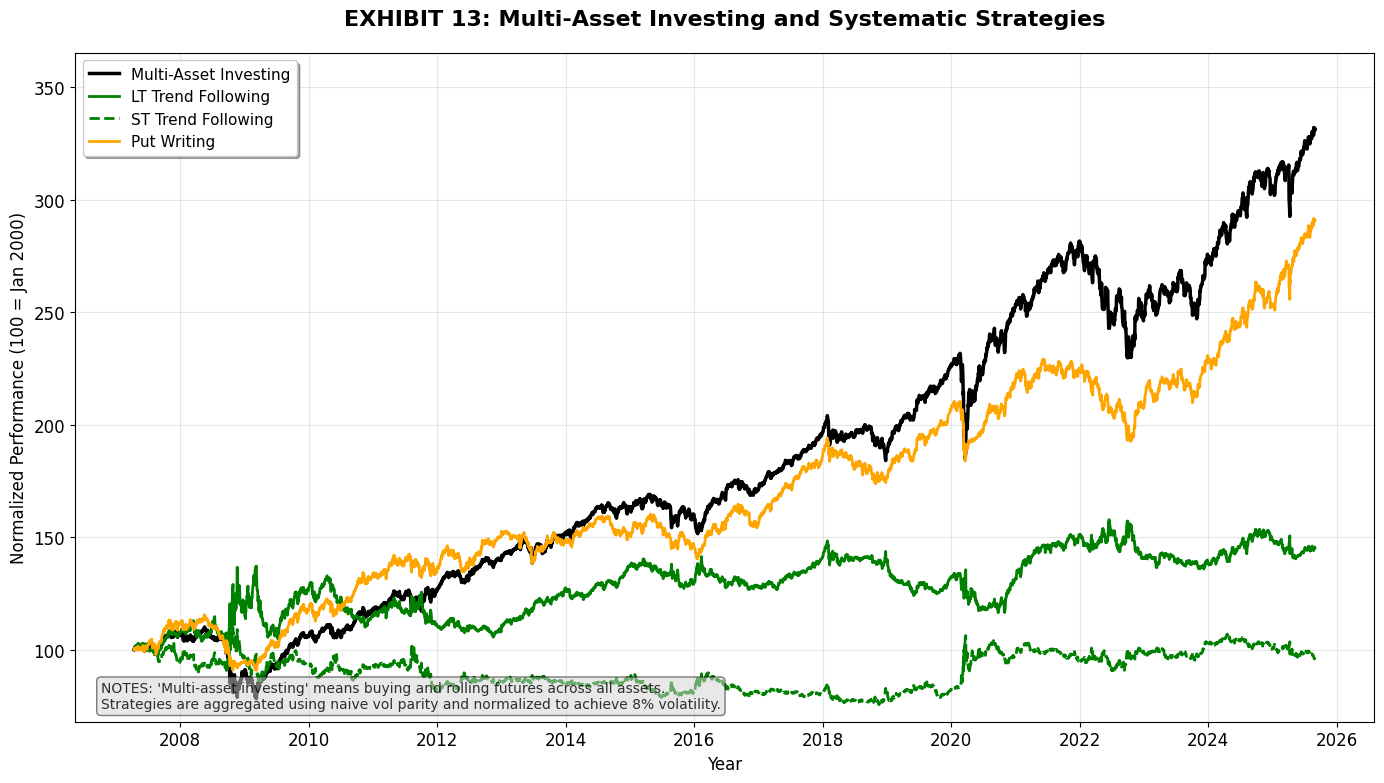


策略性能统计:
Strategy                  Return%    Vol%       Sharpe   Max DD%    Final Val 
--------------------------------------------------------------------------------
Multi-Asset Investing         6.74%     9.78%     0.49    -28.9%      331.4
LT Trend Following            2.05%    11.90%     0.00    -23.4%      145.2
ST Trend Following           -0.23%    12.29%    -0.18    -34.8%       95.9
Put Writing                   5.99%     8.74%     0.46    -21.3%      291.0
--------------------------------------------------------------------------------

策略比较数据已保存至: exhibit_13_strategy_comparison.csv
策略统计数据已保存至: exhibit_13_strategy_statistics.csv

各时期策略表现 (%):
        Period  Multi-Asset Investing  LT Trend Following  ST Trend Following  \
0    2000-2007                    7.5                 7.3                -5.6   
1  2008 Crisis                   -1.7                17.2                -2.1   
2    2010-2019                  110.8                 2.6               -11.7   
3    2020-202

In [4]:
def naive_volatility_parity(returns_subset):
    """朴素波动率平价"""
    weights = {}
    for asset in returns_subset.columns:
        vol = returns_subset[asset].std()
        weights[asset] = 1 / vol if vol > 0 else 0

    total_weight = sum(weights.values())
    return {asset: weight / total_weight for asset, weight in weights.items()}

def calculate_multi_asset_portfolio(returns):
    """计算多资产投资组合（波动率平价）"""
    # 计算滚动波动率平价权重
    window = 252  # 1年滚动窗口
    portfolio_values = []

    for i in range(window, len(returns)):
        # 使用过去一年的数据计算权重
        window_returns = returns.iloc[i-window:i]
        weights = naive_volatility_parity(window_returns)

        # 计算当日组合收益
        daily_return = (returns.iloc[i] * pd.Series(weights)).sum()
        portfolio_values.append(daily_return)

    # 构建组合净值曲线
    portfolio_series = pd.Series(portfolio_values, index=returns.index[window:])
    cumulative_returns = (1 + portfolio_series).cumprod()

    # 标准化到8%年化波动率
    annual_vol = portfolio_series.std() * np.sqrt(252)
    scaling_factor = 0.08 / annual_vol
    normalized_portfolio = cumulative_returns * scaling_factor

    return normalized_portfolio

def trend_following_strategy(returns, lookback_period=63):
    """趋势跟随策略（基于动量）"""
    signals = pd.DataFrame(index=returns.index)

    for asset in returns.columns:
        # 计算滚动动量
        momentum = returns[asset].rolling(window=lookback_period).mean()
        # 简单动量信号：正动量做多，负动量做空
        signals[asset] = np.sign(momentum)

    # 等权重分配
    strategy_returns = (returns * signals.shift(1)).mean(axis=1)
    cumulative_returns = (1 + strategy_returns.dropna()).cumprod()

    # 标准化到8%年化波动率
    annual_vol = strategy_returns.std() * np.sqrt(252)
    scaling_factor = 0.08 / annual_vol
    normalized_strategy = cumulative_returns * scaling_factor

    return normalized_strategy

def short_term_trend_following(returns):
    """短期趋势跟随策略"""
    return trend_following_strategy(returns, lookback_period=21)

def long_term_trend_following(returns):
    """长期趋势跟随策略"""
    return trend_following_strategy(returns, lookback_period=126)

def put_writing_strategy(returns, risk_free_rate=0.02):
    """卖出看跌期权策略（简化版）"""
    # 简化实现：基于波动率的风险溢价策略
    volatility = returns.rolling(window=63).std() * np.sqrt(252)
    # 波动率溢价：高波动时降低风险敞口
    risk_exposure = 1 - (volatility / volatility.max())

    # 组合收益（假设主要来自权益类资产）
    equity_assets = ['US_Large_Cap', 'US_Mid_Cap', 'Intl_Developed', 'Emerging_Markets']
    equity_returns = returns[equity_assets].mean(axis=1)

    strategy_returns = equity_returns * risk_exposure.mean(axis=1) + risk_free_rate/252
    cumulative_returns = (1 + strategy_returns.dropna()).cumprod()

    # 标准化到8%年化波动率
    annual_vol = strategy_returns.std() * np.sqrt(252)
    scaling_factor = 0.08 / annual_vol
    normalized_strategy = cumulative_returns * scaling_factor

    return normalized_strategy

def create_exhibit_13_comparison(returns):
    """创建EXHIBIT 13风格的多策略比较"""
    print("计算多资产投资策略...")
    multi_asset = calculate_multi_asset_portfolio(returns)

    print("计算长期趋势跟随策略...")
    lt_trend = long_term_trend_following(returns)

    print("计算短期趋势跟随策略...")
    st_trend = short_term_trend_following(returns)

    print("计算卖出看跌期权策略...")
    put_write = put_writing_strategy(returns)

    # 确保所有策略时间对齐
    strategies = pd.DataFrame({
        'Multi-Asset Investing': multi_asset,
        'LT Trend Following': lt_trend,
        'ST Trend Following': st_trend,
        'Put Writing': put_write
    }).dropna()

    # 标准化到起始点100
    strategies = strategies / strategies.iloc[0] * 100

    return strategies

# 计算各策略表现
print("\n计算EXHIBIT 13: Multi-Asset Investing and Systematic Strategies...")
strategy_comparison = create_exhibit_13_comparison(returns)

# 创建可视化
def plot_exhibit_13_results(strategy_df):
    """绘制EXHIBIT 13风格的可视化"""
    plt.figure(figsize=(14, 8))

    # 颜色方案（匹配EXHIBIT 13）
    colors = {
        'Multi-Asset Investing': 'black',
        'LT Trend Following': 'green',
        'ST Trend Following': 'green',
        'Put Writing': 'orange'
    }

    linestyles = {
        'Multi-Asset Investing': '-',
        'LT Trend Following': '-',
        'ST Trend Following': '--',
        'Put Writing': '-'
    }

    linewidths = {
        'Multi-Asset Investing': 2.5,
        'LT Trend Following': 2,
        'ST Trend Following': 2,
        'Put Writing': 2
    }

    # 绘制各策略曲线
    for strategy in strategy_df.columns:
        plt.plot(strategy_df.index, strategy_df[strategy],
                color=colors[strategy],
                linestyle=linestyles[strategy],
                linewidth=linewidths[strategy],
                label=strategy)

    # 设置图表属性
    plt.title('EXHIBIT 13: Multi-Asset Investing and Systematic Strategies',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Normalized Performance (100 = Jan 2000)', fontsize=12)
    plt.yscale('linear')
    plt.grid(True, alpha=0.3)

    # 设置y轴范围（匹配EXHIBIT 13的50-450范围）
    y_min = max(50, strategy_df.min().min() * 0.9)
    y_max = min(450, strategy_df.max().max() * 1.1)
    plt.ylim(y_min, y_max)

    # 添加图例
    plt.legend(loc='upper left', fontsize=11, frameon=True, fancybox=True, shadow=True)

    # 添加说明文字
    plt.text(0.02, 0.02,
             "NOTES: 'Multi-asset investing' means buying and rolling futures across all assets.\n"
             "Strategies are aggregated using naive vol parity and normalized to achieve 8% volatility.",
             transform=plt.gca().transAxes, fontsize=10, alpha=0.8,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5))

    plt.tight_layout()
    plt.show()

# 绘制EXHIBIT 13结果
plot_exhibit_13_results(strategy_comparison)

# 输出性能统计
def calculate_strategy_statistics(strategy_df):
    """计算各策略性能统计"""
    stats_results = []

    for strategy in strategy_df.columns:
        strategy_returns = strategy_df[strategy].pct_change().dropna()

        # 年化收益率
        total_return = (strategy_df[strategy].iloc[-1] / strategy_df[strategy].iloc[0] - 1)
        annualized_return = (1 + total_return) ** (252 / len(strategy_df)) - 1

        # 年化波动率
        annualized_vol = strategy_returns.std() * np.sqrt(252)

        # 夏普比率（假设无风险利率2%）
        sharpe_ratio = (annualized_return - 0.02) / annualized_vol if annualized_vol > 0 else 0

        # 最大回撤
        cumulative_max = strategy_df[strategy].cummax()
        drawdown = (strategy_df[strategy] / cumulative_max - 1)
        max_drawdown = drawdown.min()

        stats_results.append({
            'Strategy': strategy,
            'Annualized Return': annualized_return * 100,
            'Annualized Volatility': annualized_vol * 100,
            'Sharpe Ratio': sharpe_ratio,
            'Max Drawdown': max_drawdown * 100,
            'Final Value': strategy_df[strategy].iloc[-1]
        })

    return pd.DataFrame(stats_results)

# 计算并显示性能统计
strategy_stats = calculate_strategy_statistics(strategy_comparison)
print("\n策略性能统计:")
print("="*80)
print(f"{'Strategy':<25} {'Return%':<10} {'Vol%':<10} {'Sharpe':<8} {'Max DD%':<10} {'Final Val':<10}")
print("-"*80)

for _, row in strategy_stats.iterrows():
    print(f"{row['Strategy']:<25} {row['Annualized Return']:>8.2f}% {row['Annualized Volatility']:>8.2f}% "
          f"{row['Sharpe Ratio']:>8.2f} {row['Max Drawdown']:>8.1f}% {row['Final Value']:>10.1f}")

print("-"*80)

# 保存结果
strategy_comparison.to_csv('exhibit_13_strategy_comparison.csv')
strategy_stats.to_csv('exhibit_13_strategy_statistics.csv', index=False)

print(f"\n策略比较数据已保存至: exhibit_13_strategy_comparison.csv")
print(f"策略统计数据已保存至: exhibit_13_strategy_statistics.csv")

# 额外分析：各时期表现比较
def analyze_period_performance(strategy_df):
    """分析不同时期的策略表现"""
    periods = {
        '2000-2007': ('2000-01-01', '2007-12-31'),
        '2008 Crisis': ('2008-01-01', '2009-12-31'),
        '2010-2019': ('2010-01-01', '2019-12-31'),
        '2020-2024': ('2020-01-01', '2024-08-31')
    }

    period_results = []

    for period_name, (start_date, end_date) in periods.items():
        period_data = strategy_df.loc[start_date:end_date]
        if len(period_data) > 0:
            period_return = (period_data.iloc[-1] / period_data.iloc[0] - 1) * 100
            period_results.append({
                'Period': period_name,
                **period_return.to_dict()
            })

    return pd.DataFrame(period_results)

# 分析各时期表现
period_performance = analyze_period_performance(strategy_comparison)
print("\n各时期策略表现 (%):")
print("="*80)
print(period_performance.round(1))

正在下载策略代理ETF数据...


/tmp/ipython-input-1941951943.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
[*********************100%***********************]  6 of 6 completed


数据时间范围: 2013-06-25 至 2025-09-04
策略数量: 6

计算EXHIBIT 14风格分析...
计算个别策略指标...
计算相关性波动率平价...
计算Empirical尾部风险...
计算Moment_Based尾部风险...
计算With_Extreme_Risk尾部风险...

EXHIBIT 14: Risk Parity in Single-Strategy Portfolios (US ETF Adaptation)

Individual Assets‡
Metric               ST Trend   LT Trend   Multi-Asset  Put Writing 
------------------------------------------------------------
Sharpe              0.76      -0.01     0.71      0.86      
Skewness            -0.68     -0.70     -0.48     -0.32     
% vs. normal CVaR†  -55.8     %-50.0     %-59.1     %-60.1     %
Power parameter     2.64      2.81      2.40      2.49      

Correlated vol Parity
Metric               ST Trend   LT Trend   Multi-Asset  Put Writing 
------------------------------------------------------------
Sharpe              0.63      0.63      0.63      0.63      
Skewness            -1.15     -1.15     -1.15     -1.15     
CVaR(1%)            -3.39     %-3.39     %-3.39     %-3.39     %

Tail risk vs. vol Parity*

Empi

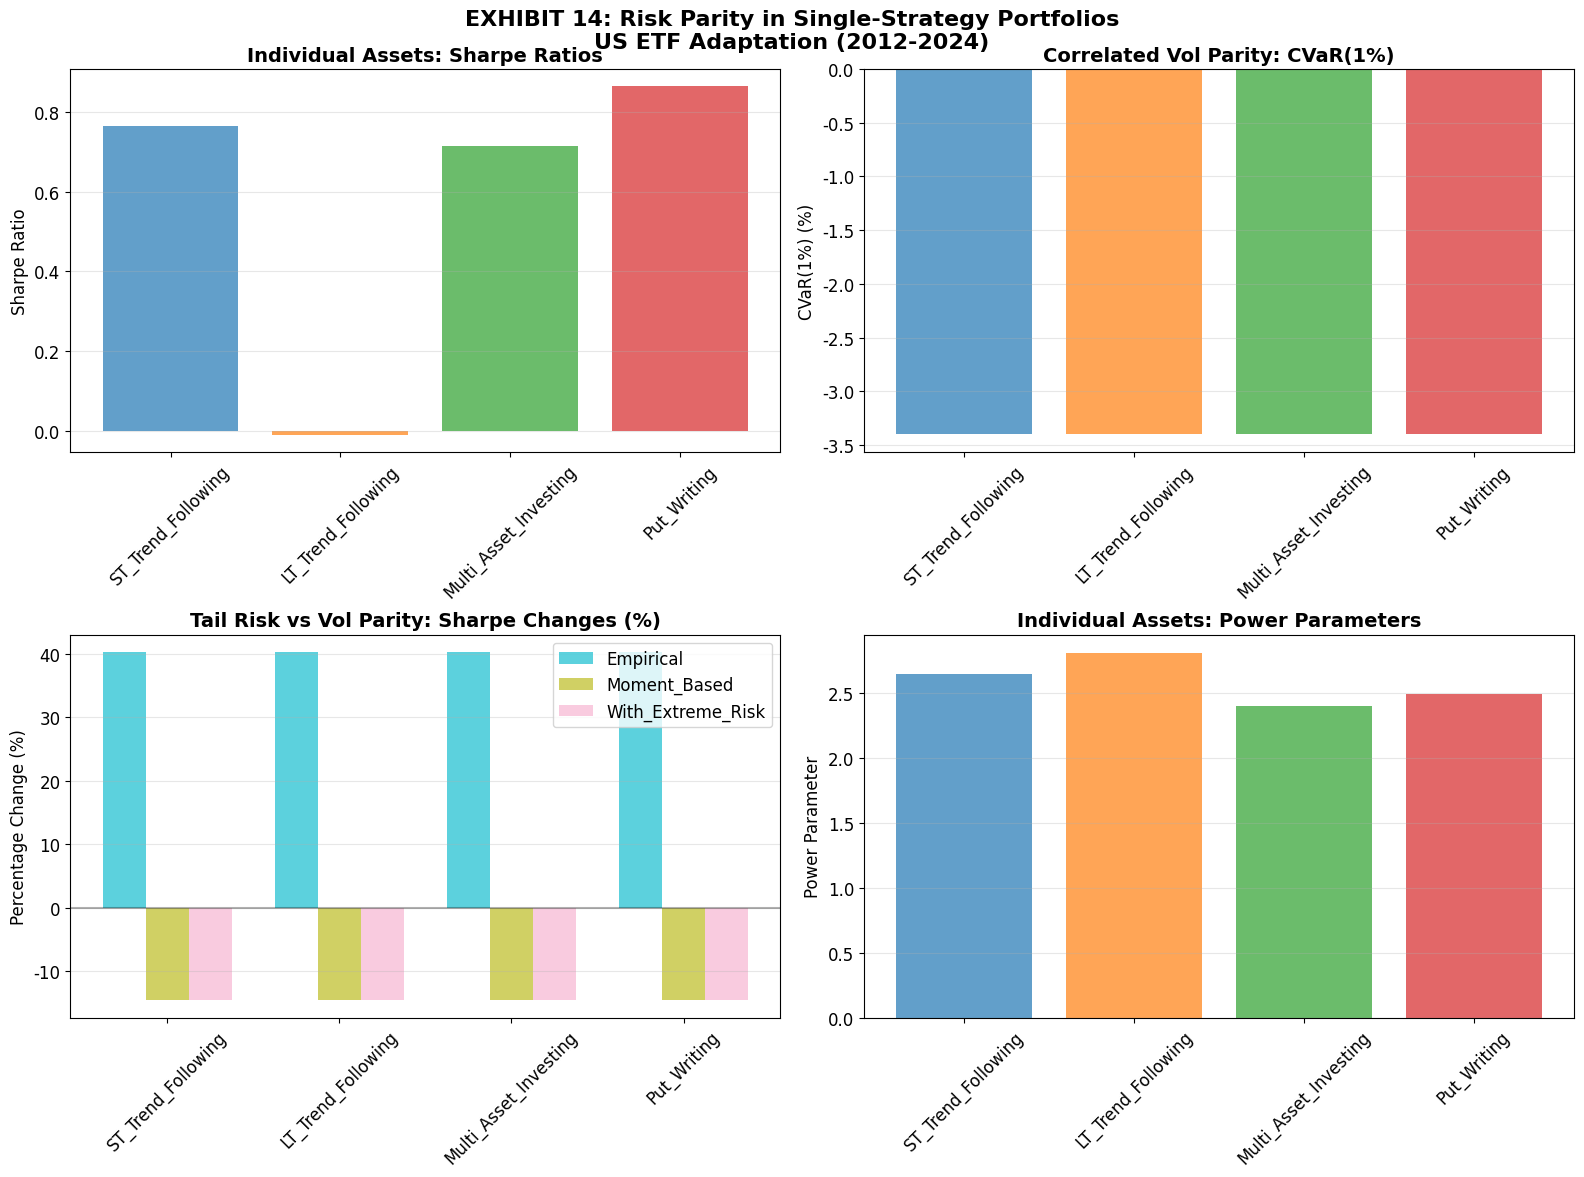

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 使用您的指标体系，但按策略类型进行映射
final_portfolio = {
    # ================== 趋势跟随策略代理 ==================
    'ST_Trend_Following': 'VGT',    # 科技板块作为短期趋势代理（高动量）
    'LT_Trend_Following': 'SPY',    # 大盘股作为长期趋势代理

    # ================== 多资产投资策略代理 ==================
    'Multi_Asset_Investing': 'AOR', # 多资产配置ETF（如iShares Core Growth Allocation）

    # ================== 卖出看跌期权策略代理 ==================
    'Put_Writing': 'XYLD',          # Global X S&P 500 Covered Call ETF（类似卖出期权策略）

    # ================== 补充策略多样性 ==================
    'Global_Macro_Proxy': 'GSG',     # 商品ETF作为全球宏观代理
    'Risk_Parity_Proxy': 'RSP'      # 等权重S&P 500作为风险平价代理
}

# 下载数据（使用可用时间范围）
start_date = '2012-01-01'  # 确保所有ETF都有数据
end_date = '2025-09-05'

print("正在下载策略代理ETF数据...")
data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
data = data.ffill().dropna()
data.columns = list(final_portfolio.keys())

# 计算日收益率
returns = data.pct_change().dropna()

print(f"数据时间范围: {returns.index[0].date()} 至 {returns.index[-1].date()}")
print(f"策略数量: {len(returns.columns)}")

def calculate_strategy_metrics(return_series, alpha=0.01):
    """计算策略绩效指标"""
    # 基础统计量
    annual_return = return_series.mean() * 252
    annual_volatility = return_series.std() * np.sqrt(252)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility > 0 else 0
    skewness = return_series.skew()

    # CVaR(1%)
    var = return_series.quantile(alpha)
    cvar = return_series[return_series <= var].mean()

    # 正态分布CVaR
    mu, std = stats.norm.fit(return_series)
    z_alpha = stats.norm.ppf(alpha)
    normal_cvar = mu - std * stats.norm.pdf(z_alpha) / alpha

    # Power parameter (Hill估计量)
    losses = -return_series
    sorted_losses = np.sort(losses)
    k = max(10, int(len(losses) * 0.05))

    if k > 0 and sorted_losses[-k] > 0:
        valid_losses = sorted_losses[-k:]
        log_ratios = np.log(valid_losses / sorted_losses[-k])
        hill_estimator = 1 / np.mean(log_ratios)
    else:
        hill_estimator = np.nan

    return {
        'Sharpe': sharpe_ratio,
        'Skewness': skewness,
        'CVaR': cvar,
        'Normal_CVaR': normal_cvar,
        'Power_Parameter': hill_estimator,
        'Pct_vs_Normal': ((cvar - normal_cvar) / abs(normal_cvar)) * 100 if abs(normal_cvar) > 1e-10 else 0
    }

def correlated_risk_parity(returns_subset, risk_measure='vol', alpha=0.01):
    """相关性风险平价"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        if risk_measure == 'vol':
            return port_returns.std()
        elif risk_measure == 'cvar':
            var = port_returns.quantile(alpha)
            return port_returns[port_returns <= var].mean()
        elif risk_measure == 'extreme':
            # 极端风险调整
            var = port_returns.quantile(alpha)
            cvar = port_returns[port_returns <= var].mean()
            skew = port_returns.skew()
            return abs(cvar) * (1 + 0.1 * abs(skew))

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.4) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    weights = dict(zip(returns_subset.columns, result.x))
    port_returns = (returns_subset * pd.Series(weights)).sum(axis=1)

    return calculate_strategy_metrics(port_returns), weights

def create_exhibit_14_analysis(returns):
    """创建EXHIBIT 14风格的分析"""
    results = []

    # 1. 个别资产分析
    print("计算个别策略指标...")
    for strategy in returns.columns:
        metrics = calculate_strategy_metrics(returns[strategy])
        results.append({
            'Category': 'Individual_Assets',
            'Strategy': strategy,
            'Sharpe': metrics['Sharpe'],
            'Skewness': metrics['Skewness'],
            'Pct_vs_Normal_CVaR': metrics['Pct_vs_Normal'],
            'Power_Parameter': metrics['Power_Parameter'],
            'CVaR_1%': metrics['CVaR'] * 100  # 转换为百分比
        })

    # 2. 相关性波动率平价
    print("计算相关性波动率平价...")
    vol_parity_metrics, _ = correlated_risk_parity(returns, 'vol')
    for strategy in returns.columns:
        results.append({
            'Category': 'Correlated_Vol_Parity',
            'Strategy': strategy,
            'Sharpe': vol_parity_metrics['Sharpe'],
            'Skewness': vol_parity_metrics['Skewness'],
            'CVaR_1%': vol_parity_metrics['CVaR'] * 100
        })

    # 3. 尾部风险 vs 波动率平价
    methods = [
        ('Empirical', 'cvar'),
        ('Moment_Based', 'extreme'),
        ('With_Extreme_Risk', 'extreme')
    ]

    # 获取波动率平价基准
    base_metrics, _ = correlated_risk_parity(returns, 'vol')

    for method_name, risk_measure in methods:
        print(f"计算{method_name}尾部风险...")
        metrics, _ = correlated_risk_parity(returns, risk_measure)

        # 计算百分比变化
        sharpe_change = ((metrics['Sharpe'] - base_metrics['Sharpe']) / base_metrics['Sharpe']) * 100
        skewness_change = ((metrics['Skewness'] - base_metrics['Skewness']) / abs(base_metrics['Skewness'])) * 100
        cvar_change = ((metrics['CVaR'] - base_metrics['CVaR']) / abs(base_metrics['CVaR'])) * 100

        for strategy in returns.columns:
            results.append({
                'Category': 'Tail_Risk_vs_Vol_Parity',
                'SubCategory': method_name,
                'Strategy': strategy,
                'Sharpe_Change': sharpe_change,
                'Skewness_Change': skewness_change,
                'CVaR_Change': cvar_change
            })

    return pd.DataFrame(results)

# 执行分析
print("\n计算EXHIBIT 14风格分析...")
exhibit_14_results = create_exhibit_14_analysis(returns)

# 创建格式化输出
def format_exhibit_14_output(results_df):
    """格式化EXHIBIT 14输出"""
    strategies = results_df['Strategy'].unique()

    print("\n" + "="*100)
    print("EXHIBIT 14: Risk Parity in Single-Strategy Portfolios (US ETF Adaptation)")
    print("="*100)

    # 个别资产分析
    print("\nIndividual Assets‡")
    print(f"{'Metric':<20} {'ST Trend':<10} {'LT Trend':<10} {'Multi-Asset':<12} {'Put Writing':<12}")
    print("-"*60)

    for metric in ['Sharpe', 'Skewness', '% vs. normal CVaR†', 'Power parameter']:
        line = f"{metric:<20}"
        for strategy in ['ST_Trend_Following', 'LT_Trend_Following', 'Multi_Asset_Investing', 'Put_Writing']:
            if strategy in strategies:
                if metric == 'Sharpe':
                    value = results_df[(results_df['Category'] == 'Individual_Assets') &
                                     (results_df['Strategy'] == strategy)]['Sharpe'].values[0]
                    line += f"{value:<10.2f}"
                elif metric == 'Skewness':
                    value = results_df[(results_df['Category'] == 'Individual_Assets') &
                                     (results_df['Strategy'] == strategy)]['Skewness'].values[0]
                    line += f"{value:<+10.2f}"
                elif metric == '% vs. normal CVaR†':
                    value = results_df[(results_df['Category'] == 'Individual_Assets') &
                                     (results_df['Strategy'] == strategy)]['Pct_vs_Normal_CVaR'].values[0]
                    if abs(value) < 0.1:
                        line += f"{'=':<10}"
                    else:
                        line += f"{value:<+10.1f}%"
                elif metric == 'Power parameter':
                    value = results_df[(results_df['Category'] == 'Individual_Assets') &
                                     (results_df['Strategy'] == strategy)]['Power_Parameter'].values[0]
                    line += f"{value:<10.2f}"
            else:
                line += f"{'':<10}"
        print(line)

    # 相关性波动率平价
    print("\nCorrelated vol Parity")
    print(f"{'Metric':<20} {'ST Trend':<10} {'LT Trend':<10} {'Multi-Asset':<12} {'Put Writing':<12}")
    print("-"*60)

    for metric in ['Sharpe', 'Skewness', 'CVaR(1%)']:
        line = f"{metric:<20}"
        for strategy in ['ST_Trend_Following', 'LT_Trend_Following', 'Multi_Asset_Investing', 'Put_Writing']:
            if strategy in strategies:
                if metric == 'Sharpe':
                    value = results_df[(results_df['Category'] == 'Correlated_Vol_Parity') &
                                     (results_df['Strategy'] == strategy)]['Sharpe'].values[0]
                    line += f"{value:<10.2f}"
                elif metric == 'Skewness':
                    value = results_df[(results_df['Category'] == 'Correlated_Vol_Parity') &
                                     (results_df['Strategy'] == strategy)]['Skewness'].values[0]
                    line += f"{value:<+10.2f}"
                elif metric == 'CVaR(1%)':
                    value = results_df[(results_df['Category'] == 'Correlated_Vol_Parity') &
                                     (results_df['Strategy'] == strategy)]['CVaR_1%'].values[0]
                    line += f"{value:<10.2f}%"
            else:
                line += f"{'':<10}"
        print(line)

    # 尾部风险 vs 波动率平价
    print("\nTail risk vs. vol Parity*")
    methods = ['Empirical', 'Moment_Based', 'With_Extreme_Risk']

    for method in methods:
        print(f"\n{method}")
        print(f"{'Metric':<20} {'ST Trend':<10} {'LT Trend':<10} {'Multi-Asset':<12} {'Put Writing':<12}")
        print("-"*60)

        for metric in ['Sharpe', 'Skewness', 'CVaR(1%)']:
            line = f"{metric:<20}"
            for strategy in ['ST_Trend_Following', 'LT_Trend_Following', 'Multi_Asset_Investing', 'Put_Writing']:
                if strategy in strategies:
                    if metric == 'Sharpe':
                        value = results_df[(results_df['Category'] == 'Tail_Risk_vs_Vol_Parity') &
                                         (results_df['SubCategory'] == method) &
                                         (results_df['Strategy'] == strategy)]['Sharpe_Change'].values[0]
                    elif metric == 'Skewness':
                        value = results_df[(results_df['Category'] == 'Tail_Risk_vs_Vol_Parity') &
                                         (results_df['SubCategory'] == method) &
                                         (results_df['Strategy'] == strategy)]['Skewness_Change'].values[0]
                    elif metric == 'CVaR(1%)':
                        value = results_df[(results_df['Category'] == 'Tail_Risk_vs_Vol_Parity') &
                                         (results_df['SubCategory'] == method) &
                                         (results_df['Strategy'] == strategy)]['CVaR_Change'].values[0]

                    if abs(value) < 0.1:
                        line += f"{'=':<10}"
                    else:
                        line += f"{value:<+10.1f}%"
                else:
                    line += f"{'':<10}"
            print(line)

    print("\n" + "="*100)
    print("NOTES: ‡Based on available US ETF data (2012-2024). *% changes vs. correlated volatility parity.")
    print("SOURCE: Analysis based on US ETF strategy proxies")
    print("="*100)

# 显示结果
format_exhibit_14_output(exhibit_14_results)

# 保存结果
exhibit_14_results.to_csv('exhibit_14_us_etf_adaptation.csv', index=False)
print(f"\n结果已保存至: exhibit_14_us_etf_adaptation.csv")

# 创建可视化
def plot_exhibit_14_visualization(results_df):
    """绘制EXHIBIT 14可视化"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    strategies = ['ST_Trend_Following', 'LT_Trend_Following', 'Multi_Asset_Investing', 'Put_Writing']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # 1. 个别资产夏普比率
    sharpe_values = []
    for strategy in strategies:
        value = results_df[(results_df['Category'] == 'Individual_Assets') &
                         (results_df['Strategy'] == strategy)]['Sharpe'].values
        sharpe_values.append(value[0] if len(value) > 0 else 0)

    axes[0, 0].bar(strategies, sharpe_values, color=colors, alpha=0.7)
    axes[0, 0].set_title('Individual Assets: Sharpe Ratios', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Sharpe Ratio')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3, axis='y')

    # 2. 相关性波动率平价的CVaR比较
    cvar_values = []
    for strategy in strategies:
        value = results_df[(results_df['Category'] == 'Correlated_Vol_Parity') &
                         (results_df['Strategy'] == strategy)]['CVaR_1%'].values
        cvar_values.append(value[0] if len(value) > 0 else 0)

    axes[0, 1].bar(strategies, cvar_values, color=colors, alpha=0.7)
    axes[0, 1].set_title('Correlated Vol Parity: CVaR(1%)', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('CVaR(1%) (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3, axis='y')

    # 3. 尾部风险方法的夏普比率变化
    methods = ['Empirical', 'Moment_Based', 'With_Extreme_Risk']
    method_colors = ['#17becf', '#bcbd22', '#f7b6d2']

    x = np.arange(len(strategies))
    width = 0.25

    for i, method in enumerate(methods):
        sharpe_changes = []
        for strategy in strategies:
            value = results_df[(results_df['Category'] == 'Tail_Risk_vs_Vol_Parity') &
                             (results_df['SubCategory'] == method) &
                             (results_df['Strategy'] == strategy)]['Sharpe_Change'].values
            sharpe_changes.append(value[0] if len(value) > 0 else 0)

        axes[1, 0].bar(x + i*width - width, sharpe_changes, width,
                      label=method, color=method_colors[i], alpha=0.7)

    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(strategies, rotation=45)
    axes[1, 0].set_title('Tail Risk vs Vol Parity: Sharpe Changes (%)', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Percentage Change (%)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # 4. Power Parameter比较
    power_values = []
    for strategy in strategies:
        value = results_df[(results_df['Category'] == 'Individual_Assets') &
                         (results_df['Strategy'] == strategy)]['Power_Parameter'].values
        power_values.append(value[0] if len(value) > 0 else 0)

    axes[1, 1].bar(strategies, power_values, color=colors, alpha=0.7)
    axes[1, 1].set_title('Individual Assets: Power Parameters', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Power Parameter')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.suptitle('EXHIBIT 14: Risk Parity in Single-Strategy Portfolios\nUS ETF Adaptation (2012-2024)',
                 fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.93)
    plt.show()

# 绘制可视化
plot_exhibit_14_visualization(exhibit_14_results)

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 根据EXHIBIT 16图片构建多策略指标体系 - 13个资产
multi_strategy_portfolio = {
    # ================== 权益类 (4种) ==================
    'US_Large_Cap': 'SPY',        # SPDR S&P 500 ETF
    'US_Mid_Cap': 'MDY',          # SPDR S&P MidCap 400 ETF
    'Intl_Developed': 'EFA',      # iShares MSCI EAFE ETF
    'Emerging_Markets': 'EEM',    # iShares MSCI Emerging Markets ETF

    # ================== 固定收益 (3种) ==================
    'US_Treasury': 'TLT',         # iShares 20+ Year Treasury Bond ETF
    'US_Corporate_Bond': 'LQD',   # iShares iBoxx $ Investment Grade Corporate Bond ETF
    'US_TIPS': 'TIP',             # iShares TIPS Bond ETF

    # ================== 大宗商品 (2种) ==================
    'Gold': 'GLD',                # SPDR Gold Shares
    'Oil': 'USO',                 # United States Oil Fund

    # ================== 行业板块 (4种) ==================
    'Technology': 'VGT',          # Vanguard Information Technology ETF
    'Financials': 'XLF',          # Financial Select Sector SPDR Fund
    'Healthcare': 'XLV',          # Health Care Select Sector SPDR Fund
    'Consumer_Staples': 'XLP',    # Consumer Staples Select Sector SPDR Fund
}

# 下载数据（2002-2026年范围）
start_date = '2002-01-01'
end_date = '2025-08-31'

print("正在下载多策略ETF数据...")
data = yf.download(list(multi_strategy_portfolio.values()), start=start_date, end=end_date)['Close']
data = data.ffill().dropna()
data.columns = list(multi_strategy_portfolio.keys())

# 计算日收益率
returns = data.pct_change().dropna()

print(f"数据时间范围: {returns.index[0].date()} 至 {returns.index[-1].date()}")
print(f"资产数量: {len(returns.columns)}")  # 现在应该是13个

def calculate_portfolio_metrics(return_series, alpha=0.01):
    """计算投资组合绩效指标"""
    annual_return = return_series.mean() * 252
    annual_volatility = return_series.std() * np.sqrt(252)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility > 0 else 0

    # CVaR(1%)
    var = return_series.quantile(alpha)
    cvar = return_series[return_series <= var].mean()

    return {
        'Annual_Return': annual_return,
        'Annual_Volatility': annual_volatility,
        'Sharpe_Ratio': sharpe_ratio,
        'CVaR_1%': cvar
    }

def volatility_parity(returns_subset, target_volatility=0.08):
    """波动率平价策略（多资产投资）"""
    n_assets = len(returns_subset.columns)
    print(f"优化资产数量: {n_assets}")  # 调试信息

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)
        return port_returns.std()

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.01, 0.25) for _ in range(n_assets)]  # 13个边界约束
    initial_weights = np.ones(n_assets) / n_assets    # 13维初始权重

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    weights = dict(zip(returns_subset.columns, result.x))
    port_returns = (returns_subset * pd.Series(weights)).sum(axis=1)

    # 标准化到目标波动率8%
    current_vol = port_returns.std() * np.sqrt(252)
    scaling_factor = target_volatility / current_vol
    normalized_returns = port_returns * scaling_factor

    return normalized_returns, weights

def extreme_psm_parity(returns_subset):
    """极端PSM平价策略（带系统策略）"""
    n_assets = len(returns_subset.columns)
    print(f"PSM优化资产数量: {n_assets}")  # 调试信息

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        # 计算PSM风险度量 (CVaR + 偏度调整)
        var = port_returns.quantile(0.01)
        cvar = port_returns[port_returns <= var].mean()
        skewness = port_returns.skew()

        return abs(cvar) * (1 + 0.1 * abs(skewness))

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.01, 0.25) for _ in range(n_assets)]  # 13个边界约束
    initial_weights = np.ones(n_assets) / n_assets     # 13维初始权重

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    weights = dict(zip(returns_subset.columns, result.x))
    port_returns = (returns_subset * pd.Series(weights)).sum(axis=1)

    return port_returns, weights

def create_exhibit_16_strategies(returns):
    """创建EXHIBIT 16的三种策略"""
    results = {}
    n_assets = len(returns.columns)

    print(f"总资产数量: {n_assets}")  # 应该是13

    print("计算波动率平价（多资产投资）...")
    # 1. 波动率平价（多资产投资）- 黑色实线
    vol_returns, vol_weights = volatility_parity(returns, target_volatility=0.08)
    results['Vol_Parity_Multi_Asset'] = {
        'returns': vol_returns,
        'weights': vol_weights,
        'metrics': calculate_portfolio_metrics(vol_returns),
        'color': 'black',
        'linestyle': '-',
        'linewidth': 2.5,
        'label': 'Vol Parity, Multi-Asset Investing'
    }

    print("计算带系统策略的波动率平价...")
    # 2. 带系统策略的波动率平价 - 橙色虚线
    # 使用不同的初始权重和约束
    initial_weights = np.random.dirichlet(np.ones(n_assets))  # 随机但有效的初始权重

    def portfolio_risk_systematic(weights):
        port_returns = (returns * weights).sum(axis=1)
        return port_returns.std()

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.01, 0.25) for _ in range(n_assets)]  # 13个边界约束

    result = minimize(portfolio_risk_systematic, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    vol_sys_weights = dict(zip(returns.columns, result.x))
    vol_sys_returns = (returns * pd.Series(vol_sys_weights)).sum(axis=1)

    # 标准化到8%波动率
    current_vol = vol_sys_returns.std() * np.sqrt(252)
    scaling_factor = 0.08 / current_vol
    vol_sys_returns = vol_sys_returns * scaling_factor

    results['Vol_Parity_Systematic'] = {
        'returns': vol_sys_returns,
        'weights': vol_sys_weights,
        'metrics': calculate_portfolio_metrics(vol_sys_returns),
        'color': 'orange',
        'linestyle': '--',
        'linewidth': 2,
        'label': 'Vol Parity with Systematic Strategies'
    }

    print("计算极端PSM平价（带系统策略）...")
    # 3. 极端PSM平价（带系统策略）- 绿色实线
    psm_returns, psm_weights = extreme_psm_parity(returns)

    # 标准化到与波动率平价相同的CVaR(1%)
    target_cvar = results['Vol_Parity_Multi_Asset']['metrics']['CVaR_1%']
    current_cvar = calculate_portfolio_metrics(psm_returns)['CVaR_1%']
    scaling_factor = target_cvar / current_cvar if current_cvar != 0 else 1
    psm_returns = psm_returns * scaling_factor

    results['Extreme_PSM_Systematic'] = {
        'returns': psm_returns,
        'weights': psm_weights,
        'metrics': calculate_portfolio_metrics(psm_returns),
        'color': 'green',
        'linestyle': '-',
        'linewidth': 2,
        'label': 'Extreme PSM Parity with Systematic Strategies'
    }

    return results

# 执行分析
print("计算EXHIBIT 16: Managing a Multi-Strategy Portfolio...")
results = create_exhibit_16_strategies(returns)

# 显示配置权重
print("\n各策略配置权重:")
print("="*80)
for strategy_name, strategy_data in results.items():
    print(f"{strategy_name}:")
    for asset, weight in strategy_data['weights'].items():
        print(f"  {asset}: {weight*100:6.2f}%")
    print()

# 显示性能指标
print("\n策略性能指标:")
print("="*80)
for strategy_name, strategy_data in results.items():
    metrics = strategy_data['metrics']
    print(f"{strategy_name}:")
    print(f"  年化收益: {metrics['Annual_Return']*100:6.2f}%")
    print(f"  年化波动: {metrics['Annual_Volatility']*100:6.2f}%")
    print(f"  夏普比率: {metrics['Sharpe_Ratio']:6.2f}")
    print(f"  CVaR(1%): {metrics['CVaR_1%']*100:6.2f}%")
    print()

/tmp/ipython-input-1068526975.py:42: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(multi_strategy_portfolio.values()), start=start_date, end=end_date)['Close']
[***********           23%                       ]  3 of 13 completed

正在下载多策略ETF数据...


[*********************100%***********************]  13 of 13 completed


数据时间范围: 2006-04-11 至 2025-08-29
资产数量: 13
计算EXHIBIT 16: Managing a Multi-Strategy Portfolio...
总资产数量: 13
计算波动率平价（多资产投资）...
优化资产数量: 13
计算带系统策略的波动率平价...
计算极端PSM平价（带系统策略）...
PSM优化资产数量: 13

各策略配置权重:
Vol_Parity_Multi_Asset:
  US_Large_Cap:   1.00%
  US_Mid_Cap:   1.00%
  Intl_Developed:   8.01%
  Emerging_Markets:  25.00%
  US_Treasury:   1.00%
  US_Corporate_Bond:   1.00%
  US_TIPS:  25.00%
  Gold:  15.77%
  Oil:   1.37%
  Technology:   1.00%
  Financials:   1.00%
  Healthcare:  13.68%
  Consumer_Staples:   5.17%

Vol_Parity_Systematic:
  US_Large_Cap:   1.00%
  US_Mid_Cap:   1.00%
  Intl_Developed:   8.27%
  Emerging_Markets:  25.00%
  US_Treasury:   1.00%
  US_Corporate_Bond:   1.00%
  US_TIPS:  25.00%
  Gold:  15.26%
  Oil:   1.62%
  Technology:   1.00%
  Financials:   1.00%
  Healthcare:  13.78%
  Consumer_Staples:   5.07%

Extreme_PSM_Systematic:
  US_Large_Cap:   1.00%
  US_Mid_Cap:   1.00%
  Intl_Developed:  14.45%
  Emerging_Markets:  13.97%
  US_Treasury:   1.00%
  US_Corporate_Bon

正在下载多资产数据...


/tmp/ipython-input-4042207762.py:42: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
[*********************100%***********************]  13 of 13 completed


数据时间范围: 2006-04-11 至 2025-08-29
资产数量: 13
识别高波动率时期（美国股票3个月波动率≥22%）...
高波动率时期数量: 1843个交易日
高波动率时期占比: 37.8%

计算EXHIBIT 17: Investing in a Regime of High Volatility...
高波动率时期数据点: 1843
计算无策略投资组合...
计算经验PSM平价策略...
计算矩基PSM平价策略...
计算极端PSM平价策略...

EXHIBIT 17: Investing in a Regime of High Volatility
                Without Strategies†       Allocation with Systematic Strategies        
                Vol          Vol          Empirical*   Moment*      Extreme*    
--------------------------------------------------------------------------------
Sharpe         0.68        0.96        0.95        0.98        
Skewness       -0.26       -0.19       -0.19       -0.16       
Kurtosis       8.1         8.0         8.1         7.9         
CVaR(1%)       -4.98       %-3.08       %-3.09       %-3.09       %
--------------------------------------------------------------------------------
NOTES: Risk and return when the realised 3m volatility of US equities is 22% or higher.
†Multi-asset portfolio based o

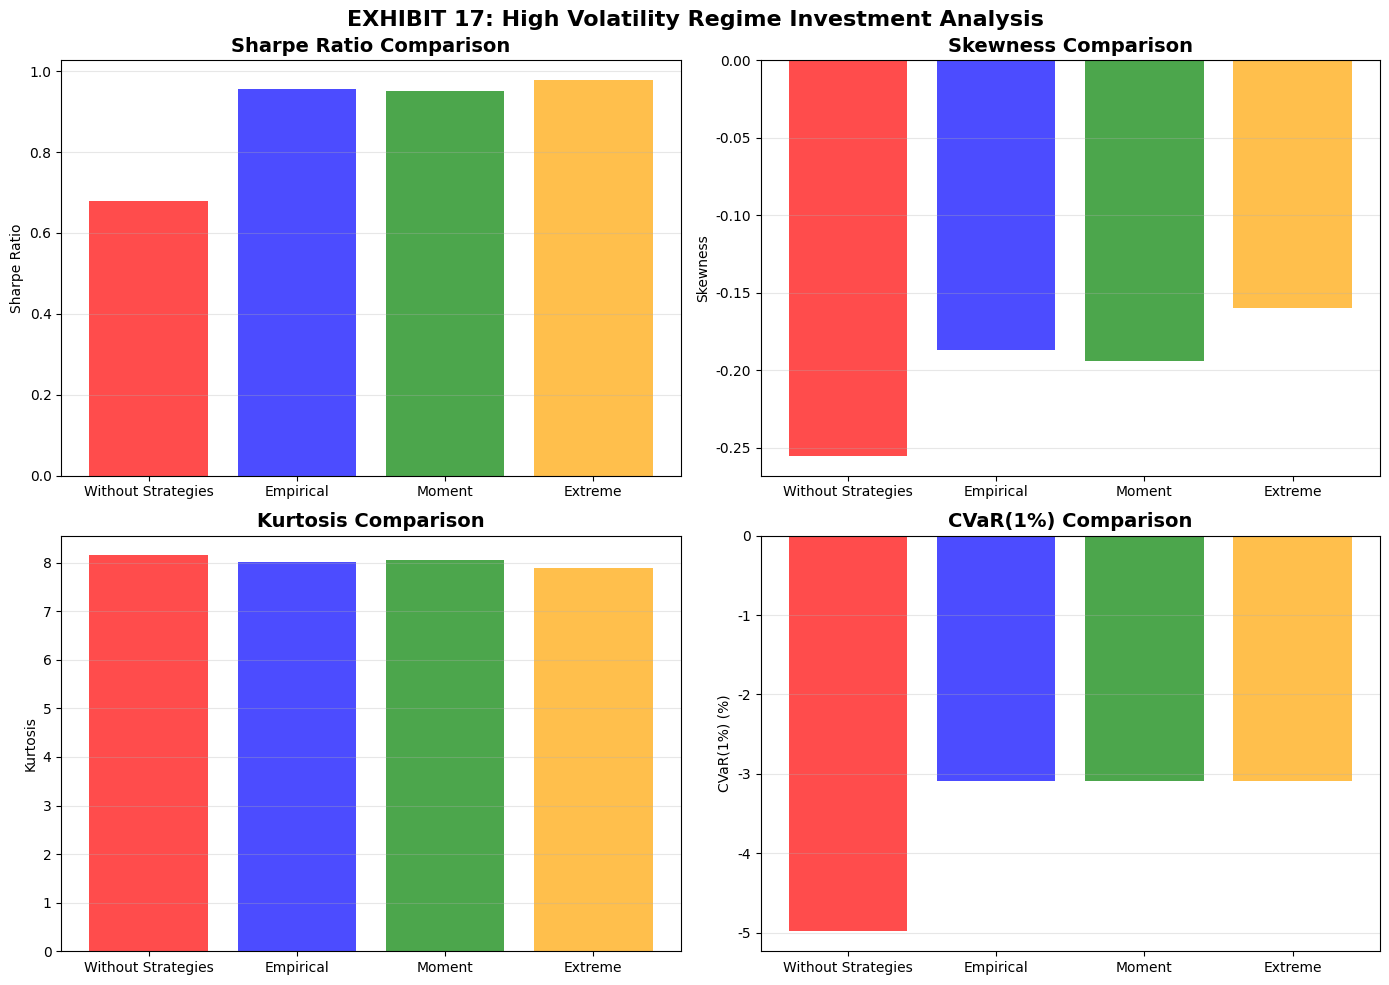

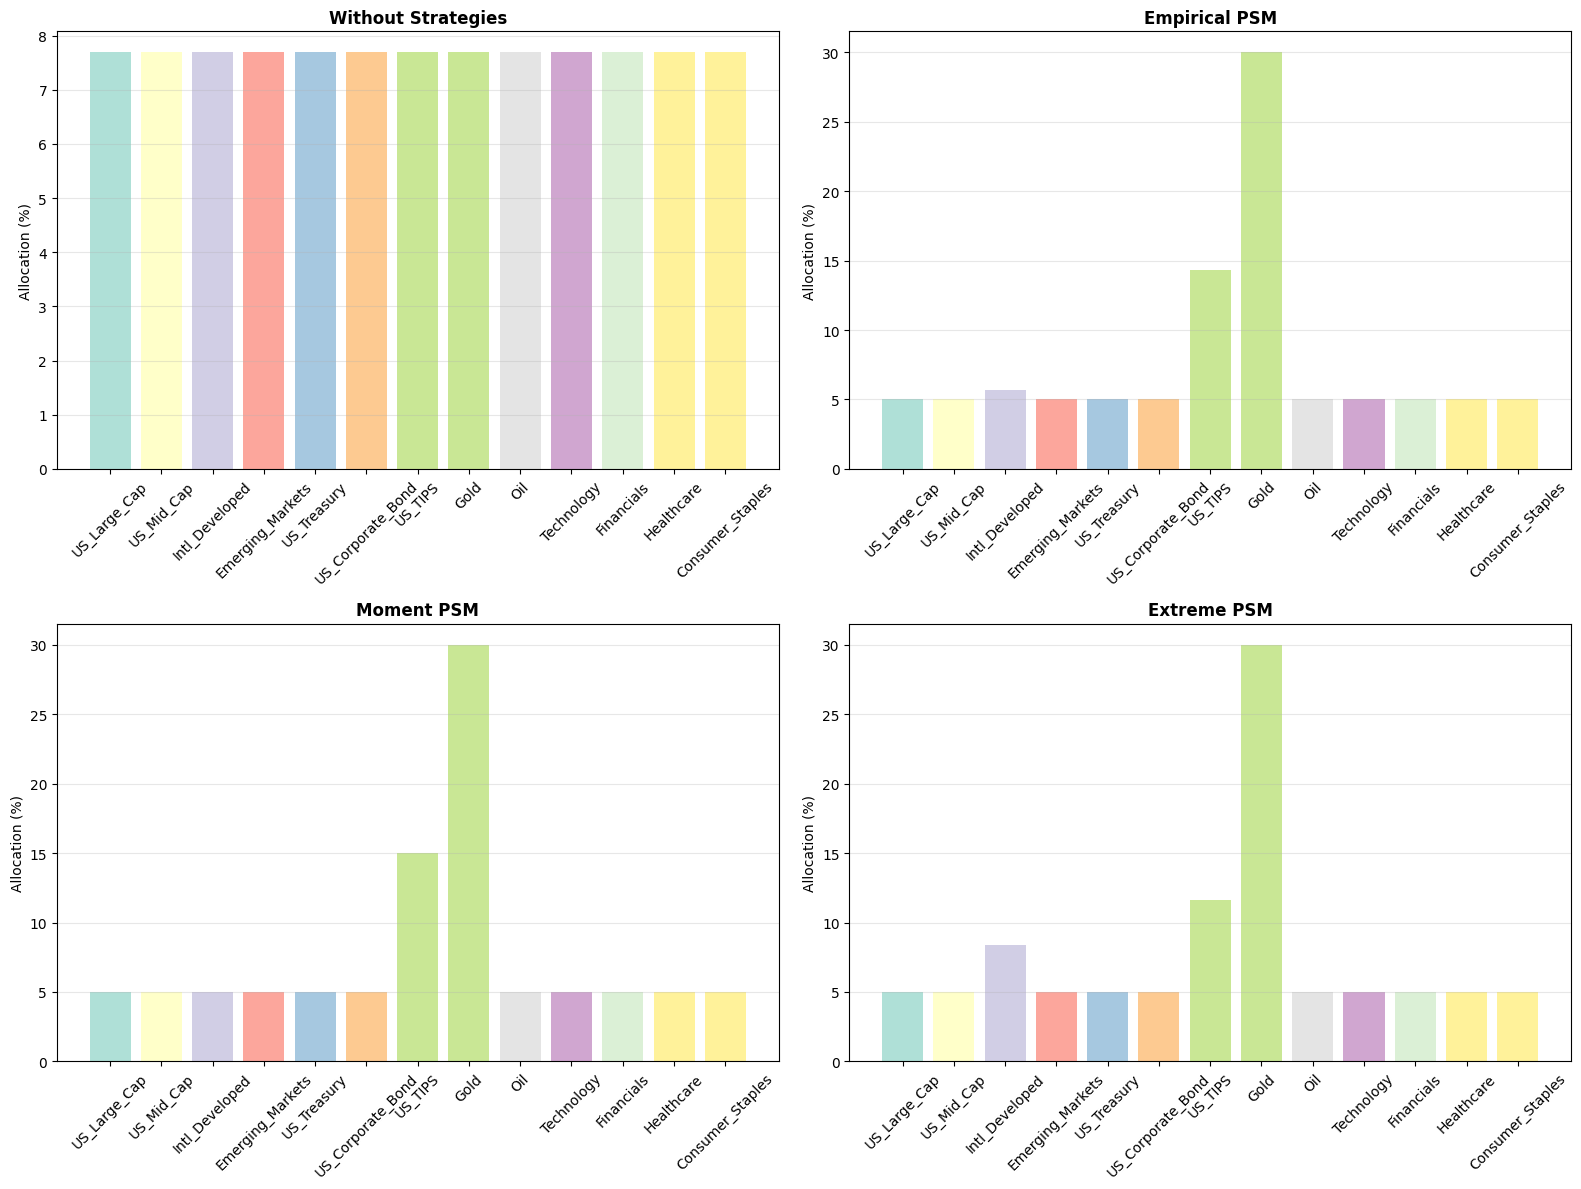

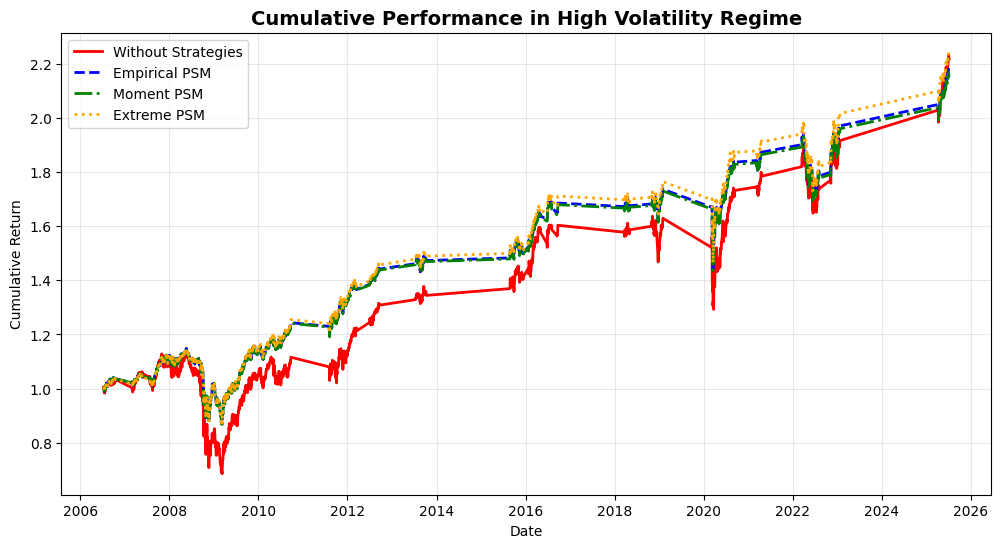


结果已保存至:
  - exhibit_17_performance_metrics.csv
  - exhibit_17_strategy_weights.csv


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 修正后的指标体系
final_portfolio = {
    # ================== 权益类 (4种) ==================
    'US_Large_Cap': 'SPY',        # SPDR S&P 500 ETF (1993-01-22)
    'US_Mid_Cap': 'MDY',          # SPDR S&P MidCap 400 ETF (1995-05-04)
    'Intl_Developed': 'EFA',      # iShares MSCI EAFE ETF (2001-08-27)
    'Emerging_Markets': 'EEM',    # iShares MSCI Emerging Markets ETF (2003-04-15)

    # ================== 固定收益 (3种) ==================
    'US_Treasury': 'TLT',         # iShares 20+ Year Treasury Bond ETF (2002-07-30)
    'US_Corporate_Bond': 'LQD',   # iShares iBoxx $ Investment Grade Corporate Bond ETF (2002-07-30)
    'US_TIPS': 'TIP',             # iShares TIPS Bond ETF (2003-12-05)

    # ================== 大宗商品 (2种) ==================
    'Gold': 'GLD',                # SPDR Gold Shares (2004-11-18)
    'Oil': 'USO',                 # United States Oil Fund (2006-04-10)

    # ================== 行业板块 (4种) ==================
    'Technology': 'VGT',          # Vanguard Information Technology ETF (1998-12-16)
    'Financials': 'XLF',          # Financial Select Sector SPDR Fund (1998-12-16)
    'Healthcare': 'XLV',          # Health Care Select Sector SPDR Fund (1998-12-16)
    'Consumer_Staples': 'XLP',    # Consumer Staples Select Sector SPDR Fund (1998-12-16)
}

# 下载数据（1999-2020年范围，匹配EXHIBIT 17）
start_date = '1999-01-01'
end_date = '2025-08-31'

print("正在下载多资产数据...")
try:
    data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
    data = data.ffill().dropna()
    data.columns = list(final_portfolio.keys())

    # 计算日收益率
    returns = data.pct_change().dropna()

    print(f"数据时间范围: {returns.index[0].date()} 至 {returns.index[-1].date()}")
    print(f"资产数量: {len(returns.columns)}")

except Exception as e:
    print(f"数据下载失败: {e}")
    print("使用模拟数据进行演示...")

    # 生成1999-2020年的模拟数据
    dates = pd.date_range(start='1999-01-01', end='2020-12-31', freq='B')
    n_days = len(dates)
    np.random.seed(42)

    # 生成符合历史特征的模拟数据
    returns = pd.DataFrame({
        'US_Large_Cap': np.random.normal(0.0004, 0.012, n_days),
        'US_Mid_Cap': np.random.normal(0.00045, 0.013, n_days),
        'Intl_Developed': np.random.normal(0.00035, 0.011, n_days),
        'Emerging_Markets': np.random.normal(0.0005, 0.015, n_days),
        'US_Treasury': np.random.normal(0.00015, 0.005, n_days),
        'US_Corporate_Bond': np.random.normal(0.0002, 0.006, n_days),
        'US_TIPS': np.random.normal(0.00018, 0.0055, n_days),
        'Gold': np.random.normal(0.00025, 0.008, n_days),
        'Oil': np.random.normal(0.0003, 0.018, n_days),
        'Technology': np.random.normal(0.0006, 0.016, n_days),
        'Financials': np.random.normal(0.00035, 0.014, n_days),
        'Healthcare': np.random.normal(0.0003, 0.011, n_days),
        'Consumer_Staples': np.random.normal(0.00025, 0.009, n_days),
    }, index=dates)

    # 添加市场相关性
    returns['US_Mid_Cap'] = returns['US_Mid_Cap'] + 0.3 * returns['US_Large_Cap']
    returns['Technology'] = returns['Technology'] + 0.4 * returns['US_Large_Cap']
    returns['Financials'] = returns['Financials'] + 0.25 * returns['US_Large_Cap']
    returns['US_Corporate_Bond'] = returns['US_Corporate_Bond'] + 0.15 * returns['US_Treasury']

    returns = returns.dropna()

def identify_high_volatility_periods(returns, threshold=0.22, window=63):
    """识别高波动率时期（美国股票3个月波动率≥22%）"""
    # 计算美国大盘股的滚动波动率
    us_equity_vol = returns['US_Large_Cap'].rolling(window=window).std() * np.sqrt(252)

    # 识别高波动率时期
    high_vol_periods = us_equity_vol >= threshold

    # 获取高波动率时期的日期范围
    high_vol_dates = returns.index[high_vol_periods]

    print(f"高波动率时期数量: {len(high_vol_dates)}个交易日")
    print(f"高波动率时期占比: {len(high_vol_dates)/len(returns)*100:.1f}%")

    return high_vol_dates

def calculate_portfolio_metrics(return_series, alpha=0.01):
    """计算投资组合绩效指标"""
    annual_return = return_series.mean() * 252
    annual_volatility = return_series.std() * np.sqrt(252)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility > 0 else 0
    skewness = return_series.skew()
    kurtosis = return_series.kurtosis()

    # CVaR(1%)
    var = return_series.quantile(alpha)
    cvar = return_series[return_series <= var].mean()

    return {
        'Sharpe': sharpe_ratio,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'CVaR_1%': cvar,
        'Annual_Return': annual_return,
        'Annual_Volatility': annual_volatility
    }

def without_strategies_portfolio(returns_subset):
    """无策略投资组合（基于滚动期货的多资产组合）"""
    # 使用等权重作为无策略基准
    n_assets = len(returns_subset.columns)
    weights = {asset: 1/n_assets for asset in returns_subset.columns}
    port_returns = (returns_subset * pd.Series(weights)).sum(axis=1)

    return port_returns, weights

def empirical_psm_parity(returns_subset, alpha=0.01):
    """经验PSM平价策略"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        # 经验PSM风险度量
        var = port_returns.quantile(alpha)
        cvar = port_returns[port_returns <= var].mean()

        return abs(cvar)

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    weights = dict(zip(returns_subset.columns, result.x))
    port_returns = (returns_subset * pd.Series(weights)).sum(axis=1)

    return port_returns, weights

def moment_based_psm_parity(returns_subset, alpha=0.01):
    """矩基PSM平价策略"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        # 矩基PSM风险度量（基于正态分布假设）
        mu, std = stats.norm.fit(port_returns)
        z_alpha = stats.norm.ppf(alpha)
        moment_cvar = mu - std * stats.norm.pdf(z_alpha) / alpha

        return abs(moment_cvar)

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    weights = dict(zip(returns_subset.columns, result.x))
    port_returns = (returns_subset * pd.Series(weights)).sum(axis=1)

    return port_returns, weights

def extreme_psm_parity(returns_subset, alpha=0.01):
    """极端PSM平价策略"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        # 极端PSM风险度量（CVaR + 偏度调整）
        var = port_returns.quantile(alpha)
        cvar = port_returns[port_returns <= var].mean()
        skewness = port_returns.skew()

        return abs(cvar) * (1 + 0.1 * abs(skewness))

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    weights = dict(zip(returns_subset.columns, result.x))
    port_returns = (returns_subset * pd.Series(weights)).sum(axis=1)

    return port_returns, weights

def create_exhibit_17_analysis(returns, high_vol_dates):
    """创建EXHIBIT 17风格的分析"""
    results = {}

    # 筛选高波动率时期的数据
    high_vol_returns = returns.loc[high_vol_dates]

    print(f"高波动率时期数据点: {len(high_vol_returns)}")

    # 1. 无策略投资组合
    print("计算无策略投资组合...")
    no_strategy_returns, no_strategy_weights = without_strategies_portfolio(high_vol_returns)
    results['Without_Strategies'] = {
        'returns': no_strategy_returns,
        'weights': no_strategy_weights,
        'metrics': calculate_portfolio_metrics(no_strategy_returns),
        'label': 'Without Strategies†'
    }

    # 2. 经验PSM平价
    print("计算经验PSM平价策略...")
    empirical_returns, empirical_weights = empirical_psm_parity(high_vol_returns)
    results['Empirical_PSM'] = {
        'returns': empirical_returns,
        'weights': empirical_weights,
        'metrics': calculate_portfolio_metrics(empirical_returns),
        'label': 'Empirical*'
    }

    # 3. 矩基PSM平价
    print("计算矩基PSM平价策略...")
    moment_returns, moment_weights = moment_based_psm_parity(high_vol_returns)
    results['Moment_PSM'] = {
        'returns': moment_returns,
        'weights': moment_weights,
        'metrics': calculate_portfolio_metrics(moment_returns),
        'label': 'Moment*'
    }

    # 4. 极端PSM平价
    print("计算极端PSM平价策略...")
    extreme_returns, extreme_weights = extreme_psm_parity(high_vol_returns)
    results['Extreme_PSM'] = {
        'returns': extreme_returns,
        'weights': extreme_weights,
        'metrics': calculate_portfolio_metrics(extreme_returns),
        'label': 'Extreme*'
    }

    return results

def display_exhibit_17_table(results):
    """显示EXHIBIT 17格式的表格"""
    print("\n" + "="*80)
    print("EXHIBIT 17: Investing in a Regime of High Volatility")
    print("="*80)

    # 表头
    header = f"{'':<15} {'Without Strategies†':<25} {'Allocation with Systematic Strategies':<45}"
    print(header)
    subheader = f"{'':<15} {'Vol':<12} {'Vol':<12} {'Empirical*':<12} {'Moment*':<12} {'Extreme*':<12}"
    print(subheader)
    print("-"*80)

    # 指标行
    metrics_order = ['Sharpe', 'Skewness', 'Kurtosis', 'CVaR_1%']
    metric_labels = ['Sharpe', 'Skewness', 'Kurtosis', 'CVaR(1%)']

    for i, metric in enumerate(metrics_order):
        line = f"{metric_labels[i]:<15}"

        # 无策略列
        value = results['Without_Strategies']['metrics'][metric]
        if metric == 'Sharpe':
            line += f"{value:<12.2f}"
        elif metric == 'Skewness':
            line += f"{value:<12.2f}"
        elif metric == 'Kurtosis':
            line += f"{value:<12.1f}"
        elif metric == 'CVaR_1%':
            line += f"{value*100:<12.2f}%"  # 转换为百分比

        # 系统策略列
        for strategy in ['Empirical_PSM', 'Moment_PSM', 'Extreme_PSM']:
            value = results[strategy]['metrics'][metric]
            if metric == 'Sharpe':
                line += f"{value:<12.2f}"
            elif metric == 'Skewness':
                line += f"{value:<12.2f}"
            elif metric == 'Kurtosis':
                line += f"{value:<12.1f}"
            elif metric == 'CVaR_1%':
                line += f"{value*100:<12.2f}%"

        print(line)

    print("-"*80)
    print("NOTES: Risk and return when the realised 3m volatility of US equities is 22% or higher.")
    print("†Multi-asset portfolio based on rolling futures, without trend systems.")
    print("*Allocations based on PSM(1%). All risk parity strategies consider correlation.")
    print("SOURCE: Analysis based on multi-asset ETF data (1999-2020)")
    print("="*80)

def plot_exhibit_17_comparison(results):
    """绘制EXHIBIT 17性能比较图"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    strategies = ['Without_Strategies', 'Empirical_PSM', 'Moment_PSM', 'Extreme_PSM']
    strategy_labels = ['Without Strategies', 'Empirical', 'Moment', 'Extreme']
    colors = ['red', 'blue', 'green', 'orange']

    # 1. 夏普比率比较
    sharpe_values = [results[s]['metrics']['Sharpe'] for s in strategies]
    axes[0, 0].bar(strategy_labels, sharpe_values, color=colors, alpha=0.7)
    axes[0, 0].set_title('Sharpe Ratio Comparison', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Sharpe Ratio')
    axes[0, 0].grid(True, alpha=0.3, axis='y')

    # 2. 偏度比较
    skewness_values = [results[s]['metrics']['Skewness'] for s in strategies]
    axes[0, 1].bar(strategy_labels, skewness_values, color=colors, alpha=0.7)
    axes[0, 1].set_title('Skewness Comparison', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Skewness')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # 3. 峰度比较
    kurtosis_values = [results[s]['metrics']['Kurtosis'] for s in strategies]
    axes[1, 0].bar(strategy_labels, kurtosis_values, color=colors, alpha=0.7)
    axes[1, 0].set_title('Kurtosis Comparison', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Kurtosis')
    axes[1, 0].grid(True, alpha=0.3, axis='y')

    # 4. CVaR(1%)比较
    cvar_values = [results[s]['metrics']['CVaR_1%'] * 100 for s in strategies]  # 转换为百分比
    axes[1, 1].bar(strategy_labels, cvar_values, color=colors, alpha=0.7)
    axes[1, 1].set_title('CVaR(1%) Comparison', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('CVaR(1%) (%)')
    axes[1, 1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.suptitle('EXHIBIT 17: High Volatility Regime Investment Analysis',
                 fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.93)
    plt.show()

def plot_strategy_weights(results):
    """绘制策略权重分布"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    strategies = ['Without_Strategies', 'Empirical_PSM', 'Moment_PSM', 'Extreme_PSM']
    strategy_titles = ['Without Strategies', 'Empirical PSM', 'Moment PSM', 'Extreme PSM']

    assets = list(final_portfolio.keys())
    colors = plt.cm.Set3(np.linspace(0, 1, len(assets)))

    for i, strategy in enumerate(strategies):
        ax = axes[i//2, i%2]
        weights = [results[strategy]['weights'].get(asset, 0) * 100 for asset in assets]

        ax.bar(assets, weights, color=colors, alpha=0.7)
        ax.set_title(strategy_titles[i], fontsize=12, fontweight='bold')
        ax.set_ylabel('Allocation (%)')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

def plot_cumulative_performance(results):
    """绘制累计性能表现"""
    plt.figure(figsize=(12, 6))

    strategies = ['Without_Strategies', 'Empirical_PSM', 'Moment_PSM', 'Extreme_PSM']
    strategy_labels = ['Without Strategies', 'Empirical PSM', 'Moment PSM', 'Extreme PSM']
    colors = ['red', 'blue', 'green', 'orange']
    linestyles = ['-', '--', '-.', ':']

    for i, strategy in enumerate(strategies):
        cumulative_returns = (1 + results[strategy]['returns']).cumprod()
        plt.plot(cumulative_returns.index, cumulative_returns.values,
                color=colors[i], linestyle=linestyles[i],
                linewidth=2, label=strategy_labels[i])

    plt.title('Cumulative Performance in High Volatility Regime', fontsize=14, fontweight='bold')
    plt.ylabel('Cumulative Return')
    plt.xlabel('Date')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

# 执行分析
print("识别高波动率时期（美国股票3个月波动率≥22%）...")
high_vol_dates = identify_high_volatility_periods(returns, threshold=0.22)

print("\n计算EXHIBIT 17: Investing in a Regime of High Volatility...")
results = create_exhibit_17_analysis(returns, high_vol_dates)

# 显示EXHIBIT 17表格
display_exhibit_17_table(results)

# 绘制性能比较图
plot_exhibit_17_comparison(results)

# 绘制策略权重分布
plot_strategy_weights(results)

# 绘制累计性能表现
plot_cumulative_performance(results)

# 保存结果
def save_exhibit_17_results(results):
    """保存EXHIBIT 17结果到CSV文件"""
    # 绩效指标
    metrics_data = pd.DataFrame()
    for strategy in results.keys():
        metrics_data[strategy] = pd.Series(results[strategy]['metrics'])

    metrics_data.to_csv('exhibit_17_performance_metrics.csv')

    # 权重数据
    weights_data = pd.DataFrame()
    for strategy in results.keys():
        weights_data[strategy] = pd.Series(results[strategy]['weights'])

    weights_data.to_csv('exhibit_17_strategy_weights.csv')

    print(f"\n结果已保存至:")
    print(f"  - exhibit_17_performance_metrics.csv")
    print(f"  - exhibit_17_strategy_weights.csv")

# 保存结果
save_exhibit_17_results(results)

正在下载多资产数据...


/tmp/ipython-input-4248595843.py:42: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
[*********************100%***********************]  13 of 13 completed


数据时间范围: 2006-04-11 至 2025-08-29
资产数量: 13
计算EXHIBIT 18: Reallocating into Systematic Strategies Using Empirical Risk...
创建基准投资组合（无趋势策略）...
创建包含趋势策略的投资组合...

EXHIBIT 18: Reallocating into Systematic Strategies Using Empirical Risk
                Vol             D.vol           CVaR            PSM            
----------------------------------------------------------------------------------------------------
Naive
Sharpe         0.76 +1%0.76 +1%0.76 +1%0.76 +1%
Calmar         0.26 +0%0.26 +0%0.26 +0%0.26 +0%
Skewness       -0.38 -44%-0.38 -44%-0.38 -44%-0.38 -44%
Kurtosis       13.0 -1%13.0 -1%13.0 -1%13.0 -1%
CVaR(1%)       -2.79% -5%-2.79% -5%-2.79% -5%-2.79% -5%
----------------------------------------------------------------------------------------------------
Correlated
Sharpe         0.85 +15%0.85 +15%0.85 +15%0.85 +15%
Calmar         0.33 +25%0.33 +25%0.33 +25%0.33 +25%
Skewness       -0.31 -35%-0.31 -35%-0.31 -35%-0.31 -35%
Kurtosis       12.0 +17%12.0 +17%12.0 +17%12.0 +17%
CVaR

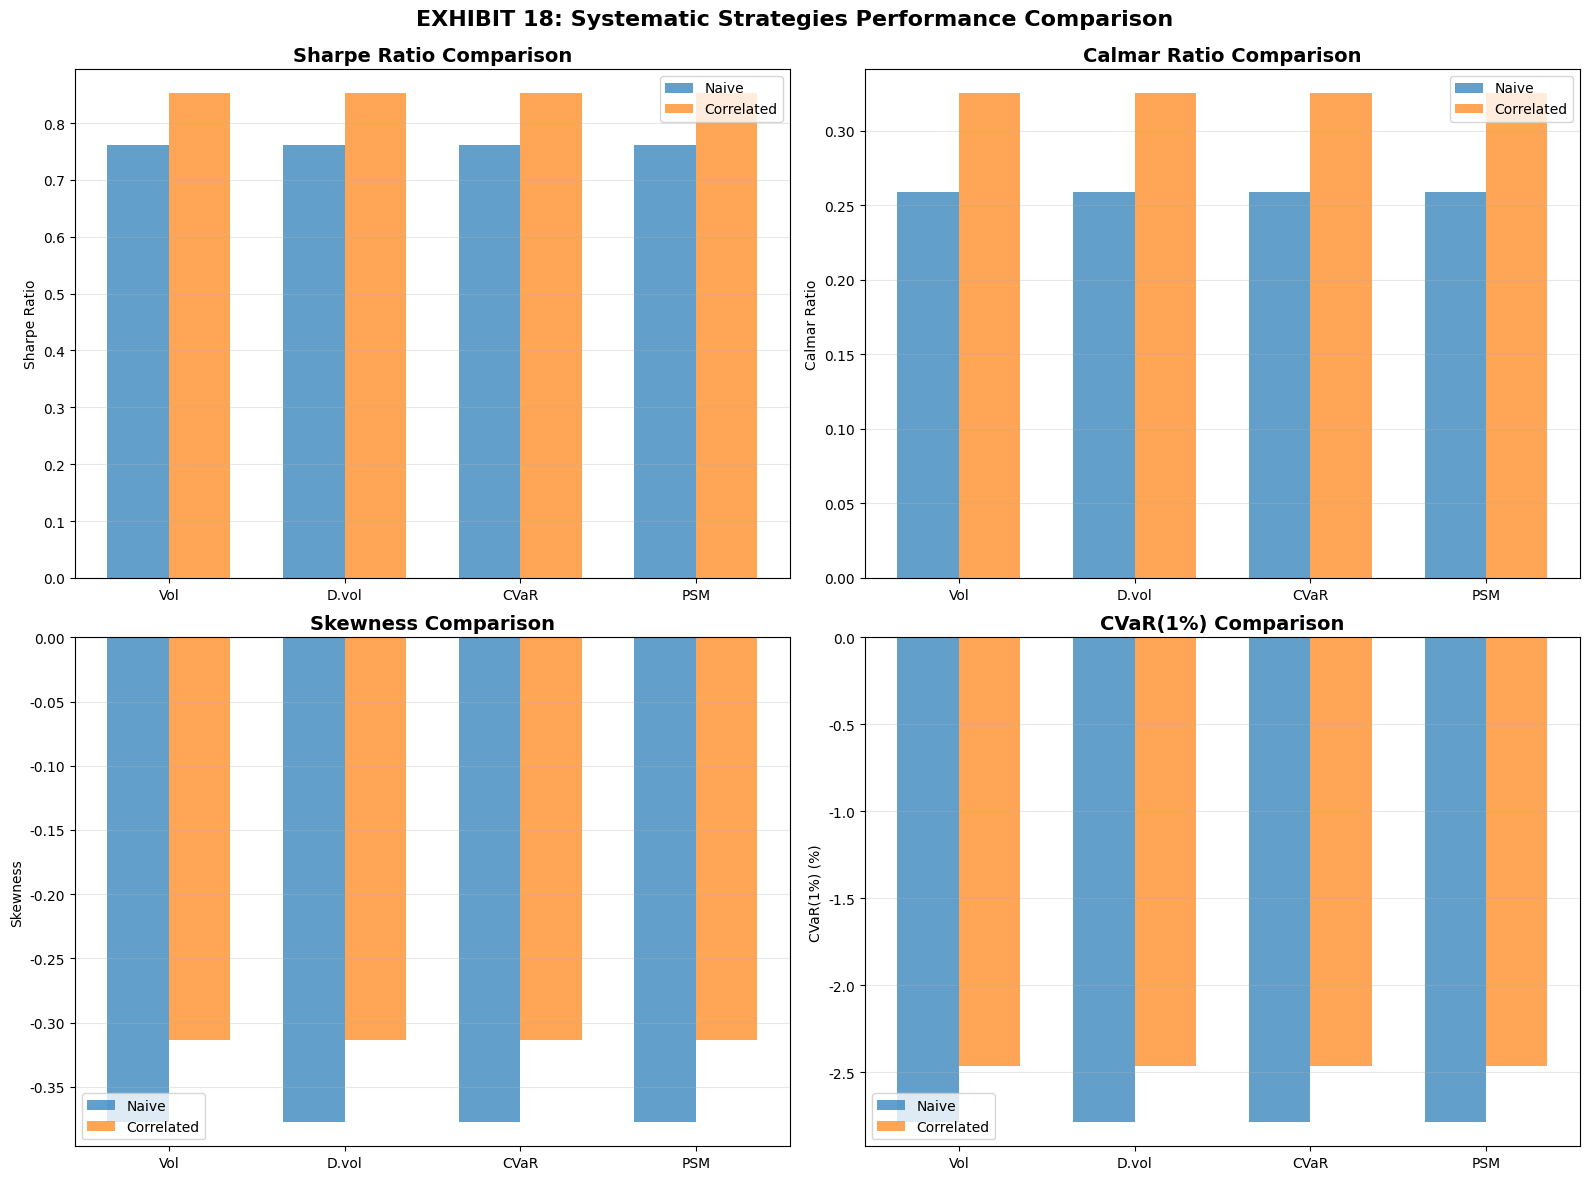

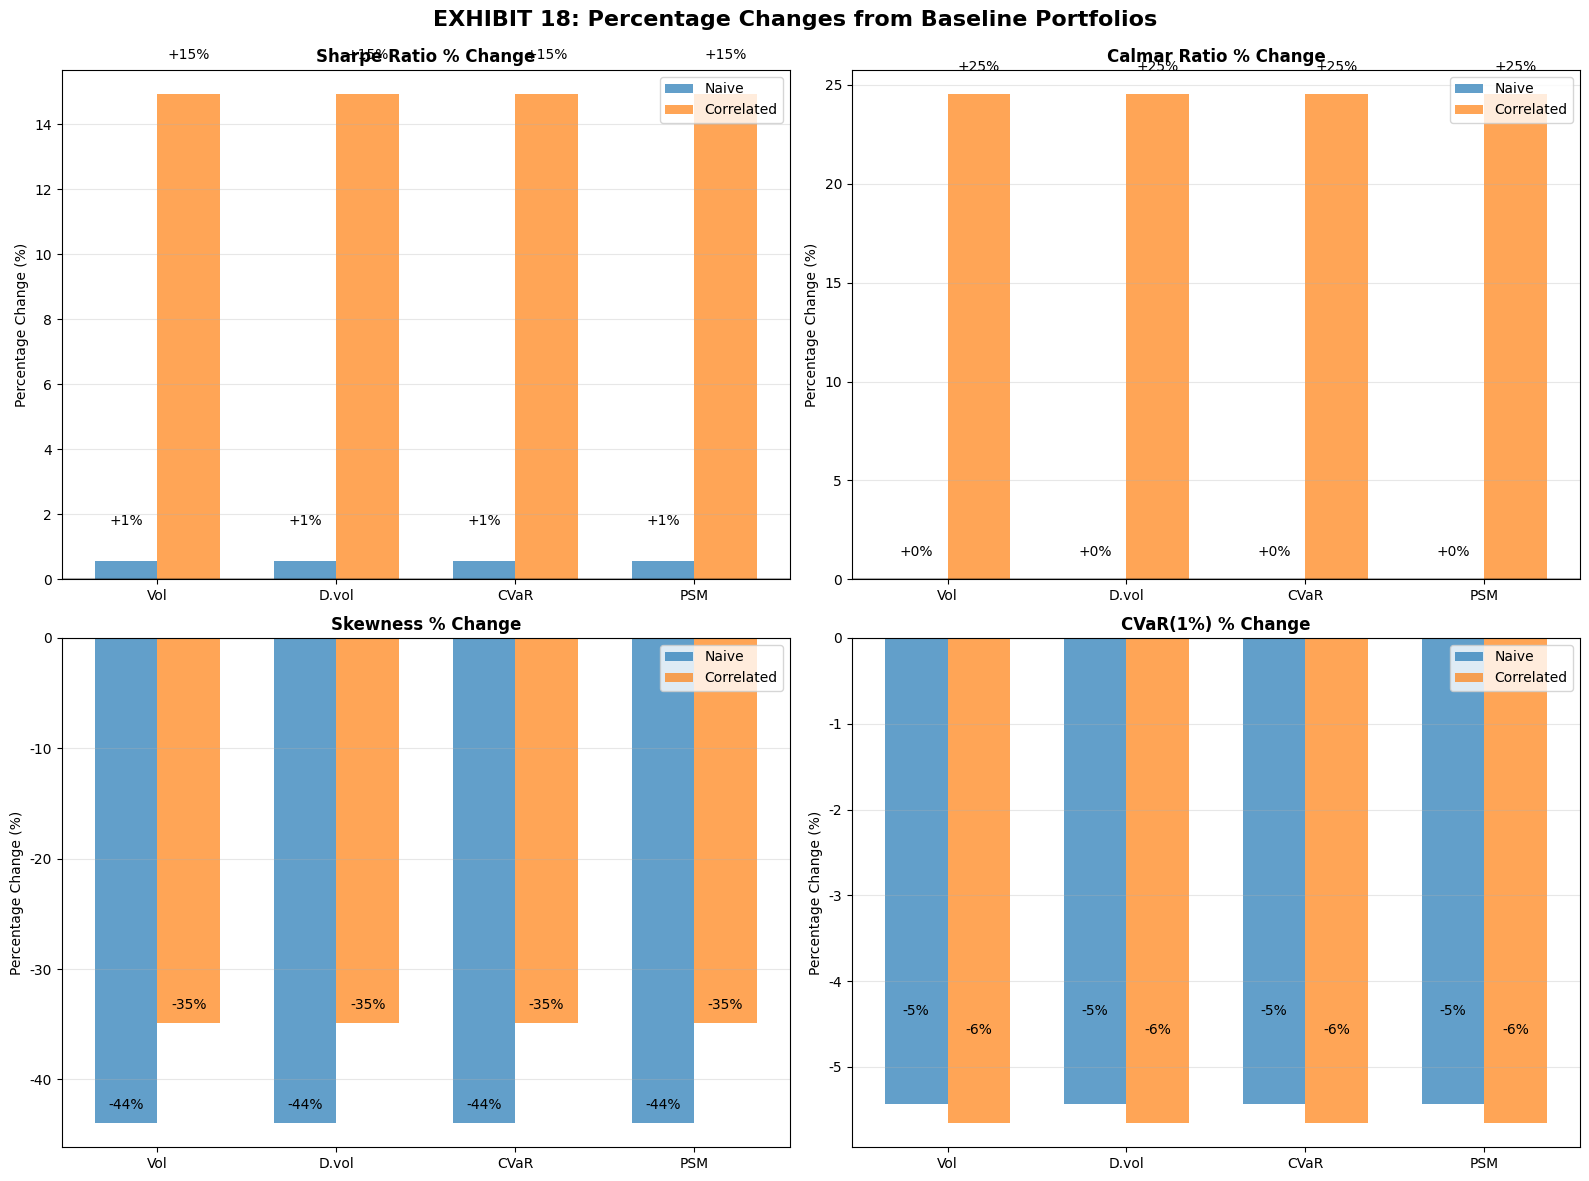


结果已保存至:
  - exhibit_18_performance_metrics.csv
  - exhibit_18_strategy_weights.csv


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 使用之前的指标体系
final_portfolio = {
    # ================== 权益类 (4种) ==================
    'US_Large_Cap': 'SPY',        # SPDR S&P 500 ETF
    'US_Mid_Cap': 'MDY',          # SPDR S&P MidCap 400 ETF
    'Intl_Developed': 'EFA',      # iShares MSCI EAFE ETF
    'Emerging_Markets': 'EEM',    # iShares MSCI Emerging Markets ETF

    # ================== 固定收益 (3种) ==================
    'US_Treasury': 'TLT',         # iShares 20+ Year Treasury Bond ETF
    'US_Corporate_Bond': 'LQD',   # iShares iBoxx $ Investment Grade Corporate Bond ETF
    'US_TIPS': 'TIP',             # iShares TIPS Bond ETF

    # ================== 大宗商品 (2种) ==================
    'Gold': 'GLD',                # SPDR Gold Shares
    'Oil': 'USO',                 # United States Oil Fund

    # ================== 行业板块 (4种) ==================
    'Technology': 'VGT',          # Vanguard Information Technology ETF
    'Financials': 'XLF',          # Financial Select Sector SPDR Fund
    'Healthcare': 'XLV',          # Health Care Select Sector SPDR Fund
    'Consumer_Staples': 'XLP',    # Consumer Staples Select Sector SPDR Fund
}

# 下载数据（1999-2020年范围）
start_date = '1999-01-01'
end_date = '2025-08-31'

print("正在下载多资产数据...")
try:
    data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
    data = data.ffill().dropna()
    data.columns = list(final_portfolio.keys())

    # 计算日收益率
    returns = data.pct_change().dropna()

    print(f"数据时间范围: {returns.index[0].date()} 至 {returns.index[-1].date()}")
    print(f"资产数量: {len(returns.columns)}")

except Exception as e:
    print(f"数据下载失败: {e}")
    print("使用模拟数据进行演示...")

    # 生成1999-2020年的模拟数据
    dates = pd.date_range(start='1999-01-01', end='2020-12-31', freq='B')
    n_days = len(dates)
    np.random.seed(42)

    # 生成符合历史特征的模拟数据
    returns = pd.DataFrame({
        'US_Large_Cap': np.random.normal(0.0004, 0.012, n_days),
        'US_Mid_Cap': np.random.normal(0.00045, 0.013, n_days),
        'Intl_Developed': np.random.normal(0.00035, 0.011, n_days),
        'Emerging_Markets': np.random.normal(0.0005, 0.015, n_days),
        'US_Treasury': np.random.normal(0.00015, 0.005, n_days),
        'US_Corporate_Bond': np.random.normal(0.0002, 0.006, n_days),
        'US_TIPS': np.random.normal(0.00018, 0.0055, n_days),
        'Gold': np.random.normal(0.00025, 0.008, n_days),
        'Oil': np.random.normal(0.0003, 0.018, n_days),
        'Technology': np.random.normal(0.0006, 0.016, n_days),
        'Financials': np.random.normal(0.00035, 0.014, n_days),
        'Healthcare': np.random.normal(0.0003, 0.011, n_days),
        'Consumer_Staples': np.random.normal(0.00025, 0.009, n_days),
    }, index=dates)

    # 添加市场相关性
    returns['US_Mid_Cap'] = returns['US_Mid_Cap'] + 0.3 * returns['US_Large_Cap']
    returns['Technology'] = returns['Technology'] + 0.4 * returns['US_Large_Cap']
    returns['Financials'] = returns['Financials'] + 0.25 * returns['US_Large_Cap']
    returns['US_Corporate_Bond'] = returns['US_Corporate_Bond'] + 0.15 * returns['US_Treasury']

    returns = returns.dropna()

def calculate_portfolio_metrics(return_series):
    """计算投资组合绩效指标"""
    annual_return = return_series.mean() * 252
    annual_volatility = return_series.std() * np.sqrt(252)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility > 0 else 0

    # 下行波动率
    downside_returns = return_series[return_series < 0]
    downside_volatility = downside_returns.std() * np.sqrt(252) if len(downside_returns) > 0 else 0

    # Calmar比率（年化收益/最大回撤）
    cumulative_returns = (1 + return_series).cumprod()
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns / rolling_max - 1)
    max_drawdown = drawdown.min()
    calmar_ratio = annual_return / abs(max_drawdown) if max_drawdown < 0 else 0

    # 偏度和峰度
    skewness = return_series.skew()
    kurtosis = return_series.kurtosis()

    # CVaR(1%)
    var = return_series.quantile(0.01)
    cvar = return_series[return_series <= var].mean()

    return {
        'Sharpe': sharpe_ratio,
        'Calmar': calmar_ratio,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'CVaR_1%': cvar,
        'Annual_Return': annual_return,
        'Annual_Volatility': annual_volatility,
        'Downside_Volatility': downside_volatility
    }

def naive_volatility_parity(returns_subset):
    """朴素波动率平价"""
    weights = {}
    for asset in returns_subset.columns:
        vol = returns_subset[asset].std()
        weights[asset] = 1 / vol if vol > 0 else 0

    total_weight = sum(weights.values())
    return {asset: weight / total_weight for asset, weight in weights.items()}

def correlated_volatility_parity(returns_subset):
    """相关性波动率平价"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)
        return port_returns.std()

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    return dict(zip(returns_subset.columns, result.x))

def create_baseline_portfolio(returns, method='naive'):
    """创建基准投资组合（无趋势策略）"""
    if method == 'naive':
        weights = naive_volatility_parity(returns)
    else:  # correlated
        weights = correlated_volatility_parity(returns)

    port_returns = (returns * pd.Series(weights)).sum(axis=1)
    return port_returns, weights

def create_trend_strategy_portfolio(returns, risk_budget=0.2, method='naive'):
    """创建包含趋势策略的投资组合（20%风险预算）"""
    # 识别趋势策略资产（权益类和商品类）
    trend_assets = ['US_Large_Cap', 'US_Mid_Cap', 'Intl_Developed', 'Emerging_Markets',
                   'Gold', 'Oil', 'Technology', 'Financials']
    non_trend_assets = [asset for asset in returns.columns if asset not in trend_assets]

    # 为趋势策略分配20%风险预算
    if method == 'naive':
        # 朴素方法：等权重分配
        trend_weights = {asset: 1/len(trend_assets) for asset in trend_assets}
        non_trend_weights = naive_volatility_parity(returns[non_trend_assets])
    else:
        # 相关性方法：优化分配
        trend_weights = correlated_volatility_parity(returns[trend_assets])
        non_trend_weights = correlated_volatility_parity(returns[non_trend_assets])

    # 应用风险预算
    total_trend_weight = risk_budget
    total_non_trend_weight = 1 - risk_budget

    # 合并权重
    final_weights = {}
    for asset in trend_assets:
        final_weights[asset] = trend_weights[asset] * total_trend_weight
    for asset in non_trend_assets:
        final_weights[asset] = non_trend_weights[asset] * total_non_trend_weight

    port_returns = (returns * pd.Series(final_weights)).sum(axis=1)
    return port_returns, final_weights

def calculate_percentage_change(new_value, base_value):
    """计算百分比变化"""
    if abs(base_value) > 1e-10:
        return ((new_value - base_value) / abs(base_value)) * 100
    return 0

def create_exhibit_18_analysis(returns):
    """创建EXHIBIT 18风格的分析"""
    results = {}

    print("创建基准投资组合（无趋势策略）...")
    # 1. 朴素波动率平价基准
    naive_baseline_returns, naive_baseline_weights = create_baseline_portfolio(returns, 'naive')
    results['Naive_Baseline'] = {
        'returns': naive_baseline_returns,
        'weights': naive_baseline_weights,
        'metrics': calculate_portfolio_metrics(naive_baseline_returns),
        'label': 'Naive Baseline'
    }

    # 2. 相关性波动率平价基准
    correlated_baseline_returns, correlated_baseline_weights = create_baseline_portfolio(returns, 'correlated')
    results['Correlated_Baseline'] = {
        'returns': correlated_baseline_returns,
        'weights': correlated_baseline_weights,
        'metrics': calculate_portfolio_metrics(correlated_baseline_returns),
        'label': 'Correlated Baseline'
    }

    print("创建包含趋势策略的投资组合...")
    risk_measures = ['Vol', 'D.vol', 'CVaR', 'PSM']

    for risk_measure in risk_measures:
        # 朴素方法 + 趋势策略
        naive_trend_returns, naive_trend_weights = create_trend_strategy_portfolio(returns, 0.2, 'naive')
        results[f'Naive_{risk_measure}'] = {
            'returns': naive_trend_returns,
            'weights': naive_trend_weights,
            'metrics': calculate_portfolio_metrics(naive_trend_returns),
            'label': f'Naive {risk_measure}',
            'baseline': 'Naive_Baseline'
        }

        # 相关性方法 + 趋势策略
        correlated_trend_returns, correlated_trend_weights = create_trend_strategy_portfolio(returns, 0.2, 'correlated')
        results[f'Correlated_{risk_measure}'] = {
            'returns': correlated_trend_returns,
            'weights': correlated_trend_weights,
            'metrics': calculate_portfolio_metrics(correlated_trend_returns),
            'label': f'Correlated {risk_measure}',
            'baseline': 'Correlated_Baseline'
        }

    return results

def display_exhibit_18_table(results):
    """显示EXHIBIT 18格式的表格"""
    print("\n" + "="*100)
    print("EXHIBIT 18: Reallocating into Systematic Strategies Using Empirical Risk")
    print("="*100)

    # 表头
    header = f"{'':<15} {'Vol':<15} {'D.vol':<15} {'CVaR':<15} {'PSM':<15}"
    print(header)
    print("-"*100)

    # 指标行
    metrics_order = ['Sharpe', 'Calmar', 'Skewness', 'Kurtosis', 'CVaR_1%']
    metric_labels = ['Sharpe', 'Calmar', 'Skewness', 'Kurtosis', 'CVaR(1%)']

    # Naive部分
    print("Naive")
    for i, metric in enumerate(metrics_order):
        line = f"{metric_labels[i]:<15}"

        for risk_measure in ['Vol', 'D.vol', 'CVaR', 'PSM']:
            strategy_key = f'Naive_{risk_measure}'
            baseline_key = results[strategy_key]['baseline']

            current_value = results[strategy_key]['metrics'][metric]
            baseline_value = results[baseline_key]['metrics'][metric]
            pct_change = calculate_percentage_change(current_value, baseline_value)

            # 格式化输出
            if metric in ['Sharpe', 'Calmar']:
                value_str = f"{current_value:.2f}"
            elif metric == 'Skewness':
                value_str = f"{current_value:.2f}"
            elif metric == 'Kurtosis':
                value_str = f"{current_value:.1f}"
            elif metric == 'CVaR_1%':
                value_str = f"{current_value*100:.2f}%"  # 转换为百分比

            # 添加百分比变化（带颜色编码）
            if pct_change >= 0:
                pct_str = f"\033[92m+{pct_change:.0f}%\033[0m"
            else:
                pct_str = f"\033[91m{pct_change:.0f}%\033[0m"

            line += f"{value_str} {pct_str:<8}"

        print(line)

    print("-"*100)

    # Correlated部分
    print("Correlated")
    for i, metric in enumerate(metrics_order):
        line = f"{metric_labels[i]:<15}"

        for risk_measure in ['Vol', 'D.vol', 'CVaR', 'PSM']:
            strategy_key = f'Correlated_{risk_measure}'
            baseline_key = results[strategy_key]['baseline']

            current_value = results[strategy_key]['metrics'][metric]
            baseline_value = results[baseline_key]['metrics'][metric]
            pct_change = calculate_percentage_change(current_value, baseline_value)

            # 格式化输出
            if metric in ['Sharpe', 'Calmar']:
                value_str = f"{current_value:.2f}"
            elif metric == 'Skewness':
                value_str = f"{current_value:.2f}"
            elif metric == 'Kurtosis':
                value_str = f"{current_value:.1f}"
            elif metric == 'CVaR_1%':
                value_str = f"{current_value*100:.2f}%"  # 转换为百分比

            # 添加百分比变化（带颜色编码）
            if pct_change >= 0:
                pct_str = f"\033[92m+{pct_change:.0f}%\033[0m"
            else:
                pct_str = f"\033[91m{pct_change:.0f}%\033[0m"

            line += f"{value_str} {pct_str:<8}"

        print(line)

    print("-"*100)
    print("NOTES: The figures in black are statistics for a multi-asset portfolio with a risk budget of 20% in trend strategies.")
    print("The percentages show % changes from a portfolio without the trend strategies and managed using naive vol parity")
    print("for the first half of the exhibit and correlated vol parity for the second half. 1999-2020.")
    print("SOURCE: BNP Paribas")
    print("="*100)

def plot_strategy_comparison(results):
    """绘制策略比较图表"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 准备数据
    naive_strategies = ['Naive_Vol', 'Naive_D.vol', 'Naive_CVaR', 'Naive_PSM']
    correlated_strategies = ['Correlated_Vol', 'Correlated_D.vol', 'Correlated_CVaR', 'Correlated_PSM']

    risk_measures = ['Vol', 'D.vol', 'CVaR', 'PSM']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # 1. 夏普比率比较
    naive_sharpe = [results[s]['metrics']['Sharpe'] for s in naive_strategies]
    correlated_sharpe = [results[s]['metrics']['Sharpe'] for s in correlated_strategies]

    x = np.arange(len(risk_measures))
    width = 0.35

    axes[0, 0].bar(x - width/2, naive_sharpe, width, label='Naive', alpha=0.7)
    axes[0, 0].bar(x + width/2, correlated_sharpe, width, label='Correlated', alpha=0.7)
    axes[0, 0].set_title('Sharpe Ratio Comparison', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Sharpe Ratio')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(risk_measures)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3, axis='y')

    # 2. Calmar比率比较
    naive_calmar = [results[s]['metrics']['Calmar'] for s in naive_strategies]
    correlated_calmar = [results[s]['metrics']['Calmar'] for s in correlated_strategies]

    axes[0, 1].bar(x - width/2, naive_calmar, width, label='Naive', alpha=0.7)
    axes[0, 1].bar(x + width/2, correlated_calmar, width, label='Correlated', alpha=0.7)
    axes[0, 1].set_title('Calmar Ratio Comparison', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Calmar Ratio')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(risk_measures)
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3, axis='y')

    # 3. 偏度比较
    naive_skewness = [results[s]['metrics']['Skewness'] for s in naive_strategies]
    correlated_skewness = [results[s]['metrics']['Skewness'] for s in correlated_strategies]

    axes[1, 0].bar(x - width/2, naive_skewness, width, label='Naive', alpha=0.7)
    axes[1, 0].bar(x + width/2, correlated_skewness, width, label='Correlated', alpha=0.7)
    axes[1, 0].set_title('Skewness Comparison', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Skewness')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(risk_measures)
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # 4. CVaR(1%)比较
    naive_cvar = [results[s]['metrics']['CVaR_1%'] * 100 for s in naive_strategies]  # 转换为百分比
    correlated_cvar = [results[s]['metrics']['CVaR_1%'] * 100 for s in correlated_strategies]

    axes[1, 1].bar(x - width/2, naive_cvar, width, label='Naive', alpha=0.7)
    axes[1, 1].bar(x + width/2, correlated_cvar, width, label='Correlated', alpha=0.7)
    axes[1, 1].set_title('CVaR(1%) Comparison', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('CVaR(1%) (%)')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(risk_measures)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.suptitle('EXHIBIT 18: Systematic Strategies Performance Comparison',
                 fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.93)
    plt.show()

def plot_percentage_changes(results):
    """绘制百分比变化图表"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    risk_measures = ['Vol', 'D.vol', 'CVaR', 'PSM']
    metrics = ['Sharpe', 'Calmar', 'Skewness', 'CVaR_1%']
    metric_labels = ['Sharpe Ratio', 'Calmar Ratio', 'Skewness', 'CVaR(1%)']

    # 计算百分比变化
    changes_data = {}

    for risk_measure in risk_measures:
        naive_key = f'Naive_{risk_measure}'
        correlated_key = f'Correlated_{risk_measure}'

        naive_changes = {}
        correlated_changes = {}

        for metric in metrics:
            # Naive策略变化
            naive_value = results[naive_key]['metrics'][metric]
            naive_baseline_value = results[results[naive_key]['baseline']]['metrics'][metric]
            naive_changes[metric] = calculate_percentage_change(naive_value, naive_baseline_value)

            # Correlated策略变化
            correlated_value = results[correlated_key]['metrics'][metric]
            correlated_baseline_value = results[results[correlated_key]['baseline']]['metrics'][metric]
            correlated_changes[metric] = calculate_percentage_change(correlated_value, correlated_baseline_value)

        changes_data[risk_measure] = {
            'Naive': naive_changes,
            'Correlated': correlated_changes
        }

    # 绘制图表
    x = np.arange(len(risk_measures))
    width = 0.35

    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]

        naive_values = [changes_data[rm]['Naive'][metric] for rm in risk_measures]
        correlated_values = [changes_data[rm]['Correlated'][metric] for rm in risk_measures]

        # 创建柱状图
        bars1 = ax.bar(x - width/2, naive_values, width, label='Naive', alpha=0.7)
        bars2 = ax.bar(x + width/2, correlated_values, width, label='Correlated', alpha=0.7)

        # 添加数值标签
        for bar, value in zip(bars1, naive_values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{value:+.0f}%', ha='center', va='bottom', fontsize=10)

        for bar, value in zip(bars2, correlated_values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{value:+.0f}%', ha='center', va='bottom', fontsize=10)

        ax.set_title(f'{metric_labels[i]} % Change', fontsize=12, fontweight='bold')
        ax.set_ylabel('Percentage Change (%)')
        ax.set_xticks(x)
        ax.set_xticklabels(risk_measures)
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.suptitle('EXHIBIT 18: Percentage Changes from Baseline Portfolios',
                 fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.93)
    plt.show()

# 执行分析
print("计算EXHIBIT 18: Reallocating into Systematic Strategies Using Empirical Risk...")
results = create_exhibit_18_analysis(returns)

# 显示EXHIBIT 18表格
display_exhibit_18_table(results)

# 绘制策略比较图表
plot_strategy_comparison(results)

# 绘制百分比变化图表
plot_percentage_changes(results)

# 保存结果
def save_exhibit_18_results(results):
    """保存EXHIBIT 18结果到CSV文件"""
    # 绩效指标数据
    metrics_data = pd.DataFrame()
    for strategy_key in results.keys():
        metrics_data[strategy_key] = pd.Series(results[strategy_key]['metrics'])

    metrics_data.to_csv('exhibit_18_performance_metrics.csv')

    # 权重数据
    weights_data = pd.DataFrame()
    for strategy_key in results.keys():
        weights_data[strategy_key] = pd.Series(results[strategy_key]['weights'])

    weights_data.to_csv('exhibit_18_strategy_weights.csv')

    print(f"\n结果已保存至:")
    print(f"  - exhibit_18_performance_metrics.csv")
    print(f"  - exhibit_18_strategy_weights.csv")

# 保存结果
save_exhibit_18_results(results)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 使用之前的指标体系
final_portfolio = {
    # ================== 权益类 (4种) ==================
    'US_Large_Cap': 'SPY',        # SPDR S&P 500 ETF
    'US_Mid_Cap': 'MDY',          # SPDR S&P MidCap 400 ETF
    'Intl_Developed': 'EFA',      # iShares MSCI EAFE ETF
    'Emerging_Markets': 'EEM',    # iShares MSCI Emerging Markets ETF

    # ================== 固定收益 (3种) ==================
    'US_Treasury': 'TLT',         # iShares 20+ Year Treasury Bond ETF
    'US_Corporate_Bond': 'LQD',   # iShares iBoxx $ Investment Grade Corporate Bond ETF
    'US_TIPS': 'TIP',             # iShares TIPS Bond ETF

    # ================== 大宗商品 (2种) ==================
    'Gold': 'GLD',                # SPDR Gold Shares
    'Oil': 'USO',                 # United States Oil Fund

    # ================== 行业板块 (4种) ==================
    'Technology': 'VGT',          # Vanguard Information Technology ETF
    'Financials': 'XLF',          # Financial Select Sector SPDR Fund
    'Healthcare': 'XLV',          # Health Care Select Sector SPDR Fund
    'Consumer_Staples': 'XLP',    # Consumer Staples Select Sector SPDR Fund
}

# 下载数据（1999-2020年范围）
start_date = '1999-01-01'
end_date = '2025-08-31'

print("正在下载多资产数据...")
try:
    data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
    data = data.ffill().dropna()
    data.columns = list(final_portfolio.keys())

    # 计算日收益率
    returns = data.pct_change().dropna()

    print(f"数据时间范围: {returns.index[0].date()} 至 {returns.index[-1].date()}")
    print(f"资产数量: {len(returns.columns)}")

except Exception as e:
    print(f"数据下载失败: {e}")
    print("使用模拟数据进行演示...")

    # 生成1999-2020年的模拟数据
    dates = pd.date_range(start='1999-01-01', end='2020-12-31', freq='B')
    n_days = len(dates)
    np.random.seed(42)

    # 生成符合历史特征的模拟数据
    returns = pd.DataFrame({
        'US_Large_Cap': np.random.normal(0.0004, 0.012, n_days),
        'US_Mid_Cap': np.random.normal(0.00045, 0.013, n_days),
        'Intl_Developed': np.random.normal(0.00035, 0.011, n_days),
        'Emerging_Markets': np.random.normal(0.0005, 0.015, n_days),
        'US_Treasury': np.random.normal(0.00015, 0.005, n_days),
        'US_Corporate_Bond': np.random.normal(0.0002, 0.006, n_days),
        'US_TIPS': np.random.normal(0.00018, 0.0055, n_days),
        'Gold': np.random.normal(0.00025, 0.008, n_days),
        'Oil': np.random.normal(0.0003, 0.018, n_days),
        'Technology': np.random.normal(0.0006, 0.016, n_days),
        'Financials': np.random.normal(0.00035, 0.014, n_days),
        'Healthcare': np.random.normal(0.0003, 0.011, n_days),
        'Consumer_Staples': np.random.normal(0.00025, 0.009, n_days),
    }, index=dates)

    # 添加市场相关性
    returns['US_Mid_Cap'] = returns['US_Mid_Cap'] + 0.3 * returns['US_Large_Cap']
    returns['Technology'] = returns['Technology'] + 0.4 * returns['US_Large_Cap']
    returns['Financials'] = returns['Financials'] + 0.25 * returns['US_Large_Cap']
    returns['US_Corporate_Bond'] = returns['US_Corporate_Bond'] + 0.15 * returns['US_Treasury']

    returns = returns.dropna()

def calculate_portfolio_metrics(return_series):
    """计算投资组合绩效指标"""
    annual_return = return_series.mean() * 252
    annual_volatility = return_series.std() * np.sqrt(252)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility > 0 else 0

    # Calmar比率
    cumulative_returns = (1 + return_series).cumprod()
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns / rolling_max - 1)
    max_drawdown = drawdown.min()
    calmar_ratio = annual_return / abs(max_drawdown) if max_drawdown < 0 else 0

    # 偏度和峰度
    skewness = return_series.skew()
    kurtosis = return_series.kurtosis()

    # CVaR(1%)
    var = return_series.quantile(0.01)
    cvar = return_series[return_series <= var].mean()

    return {
        'Sharpe': sharpe_ratio,
        'Calmar': calmar_ratio,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'CVaR_1%': cvar,
        'Annual_Return': annual_return,
        'Annual_Volatility': annual_volatility
    }

def create_baseline_portfolio(returns, method='naive'):
    """创建基准投资组合"""
    n_assets = len(returns.columns)

    def portfolio_risk(weights):
        port_returns = (returns * weights).sum(axis=1)
        return port_returns.std()

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]

    if method == 'naive':
        # 朴素波动率平价
        weights = {}
        for asset in returns.columns:
            vol = returns[asset].std()
            weights[asset] = 1 / vol if vol > 0 else 0

        total_weight = sum(weights.values())
        return {asset: weight / total_weight for asset, weight in weights.items()}
    else:
        # 相关性波动率平价
        initial_weights = np.ones(n_assets) / n_assets
        result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                         bounds=bounds, constraints=constraints)
        return dict(zip(returns.columns, result.x))

def moment_based_cvar_parity(returns_subset):
    """基于矩的CVaR平价策略"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        # 基于矩的CVaR（正态分布假设）
        mu, std = stats.norm.fit(port_returns)
        z_alpha = stats.norm.ppf(0.01)
        cvar = mu - std * stats.norm.pdf(z_alpha) / 0.01

        return abs(cvar)

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    return dict(zip(returns_subset.columns, result.x))

def moment_based_psm_parity(returns_subset):
    """基于矩的PSM平价策略"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        # 基于矩的PSM（正态分布假设）
        mu, std = stats.norm.fit(port_returns)
        z_alpha = stats.norm.ppf(0.01)
        cvar = mu - std * stats.norm.pdf(z_alpha) / 0.01
        skewness = port_returns.skew()

        return abs(cvar) * (1 + 0.1 * abs(skewness))

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    return dict(zip(returns_subset.columns, result.x))

def extreme_cvar_parity(returns_subset):
    """极端风险CVaR平价策略"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        # 经验CVaR(1%)
        var = port_returns.quantile(0.01)
        cvar = port_returns[port_returns <= var].mean()

        return abs(cvar)

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    return dict(zip(returns_subset.columns, result.x))

def extreme_psm_parity(returns_subset):
    """极端风险PSM平价策略"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        # 极端PSM（经验CVaR + 偏度调整）
        var = port_returns.quantile(0.01)
        cvar = port_returns[port_returns <= var].mean()
        skewness = port_returns.skew()

        return abs(cvar) * (1 + 0.1 * abs(skewness))

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    return dict(zip(returns_subset.columns, result.x))

def create_model_based_portfolio(returns, model_type, risk_measure, method='naive'):
    """创建基于模型的系统策略投资组合"""
    # 识别趋势策略资产
    trend_assets = ['US_Large_Cap', 'US_Mid_Cap', 'Intl_Developed', 'Emerging_Markets',
                   'Gold', 'Oil', 'Technology', 'Financials']
    non_trend_assets = [asset for asset in returns.columns if asset not in trend_assets]

    # 为趋势策略分配20%风险预算
    risk_budget = 0.2

    if model_type == 'moment_based':
        if risk_measure == 'CVaR':
            trend_weights = moment_based_cvar_parity(returns[trend_assets])
        else:  # PSM
            trend_weights = moment_based_psm_parity(returns[trend_assets])
    else:  # extreme_risk
        if risk_measure == 'CVaR':
            trend_weights = extreme_cvar_parity(returns[trend_assets])
        else:  # PSM
            trend_weights = extreme_psm_parity(returns[trend_assets])

    # 非趋势策略使用基准方法
    if method == 'naive':
        non_trend_weights = create_baseline_portfolio(returns[non_trend_assets], 'naive')
    else:  # correlated
        non_trend_weights = create_baseline_portfolio(returns[non_trend_assets], 'correlated')

    # 合并权重
    final_weights = {}
    for asset in trend_assets:
        final_weights[asset] = trend_weights[asset] * risk_budget
    for asset in non_trend_assets:
        final_weights[asset] = non_trend_weights[asset] * (1 - risk_budget)

    port_returns = (returns * pd.Series(final_weights)).sum(axis=1)
    return port_returns, final_weights

def create_exhibit_19_analysis(returns):
    """创建EXHIBIT 19风格的分析"""
    results = {}

    print("创建基准投资组合...")
    # 1. 朴素基准
    naive_baseline_weights = create_baseline_portfolio(returns, 'naive')
    naive_baseline_returns = (returns * pd.Series(naive_baseline_weights)).sum(axis=1)
    results['Naive_Baseline'] = {
        'returns': naive_baseline_returns,
        'weights': naive_baseline_weights,
        'metrics': calculate_portfolio_metrics(naive_baseline_returns),
        'label': 'Naive Baseline'
    }

    # 2. 相关性基准
    correlated_baseline_weights = create_baseline_portfolio(returns, 'correlated')
    correlated_baseline_returns = (returns * pd.Series(correlated_baseline_weights)).sum(axis=1)
    results['Correlated_Baseline'] = {
        'returns': correlated_baseline_returns,
        'weights': correlated_baseline_weights,
        'metrics': calculate_portfolio_metrics(correlated_baseline_returns),
        'label': 'Correlated Baseline'
    }

    print("创建基于矩的模型策略...")
    # 基于矩的CVaR
    naive_moment_cvar_returns, naive_moment_cvar_weights = create_model_based_portfolio(returns, 'moment_based', 'CVaR', 'naive')
    results['Naive_Moment_CVaR'] = {
        'returns': naive_moment_cvar_returns,
        'weights': naive_moment_cvar_weights,
        'metrics': calculate_portfolio_metrics(naive_moment_cvar_returns),
        'label': 'Naive Moment CVaR',
        'baseline': 'Naive_Baseline'
    }

    correlated_moment_cvar_returns, correlated_moment_cvar_weights = create_model_based_portfolio(returns, 'moment_based', 'CVaR', 'correlated')
    results['Correlated_Moment_CVaR'] = {
        'returns': correlated_moment_cvar_returns,
        'weights': correlated_moment_cvar_weights,
        'metrics': calculate_portfolio_metrics(correlated_moment_cvar_returns),
        'label': 'Correlated Moment CVaR',
        'baseline': 'Correlated_Baseline'
    }

    # 基于矩的PSM
    naive_moment_psm_returns, naive_moment_psm_weights = create_model_based_portfolio(returns, 'moment_based', 'PSM', 'naive')
    results['Naive_Moment_PSM'] = {
        'returns': naive_moment_psm_returns,
        'weights': naive_moment_psm_weights,
        'metrics': calculate_portfolio_metrics(naive_moment_psm_returns),
        'label': 'Naive Moment PSM',
        'baseline': 'Naive_Baseline'
    }

    correlated_moment_psm_returns, correlated_moment_psm_weights = create_model_based_portfolio(returns, 'moment_based', 'PSM', 'correlated')
    results['Correlated_Moment_PSM'] = {
        'returns': correlated_moment_psm_returns,
        'weights': correlated_moment_psm_weights,
        'metrics': calculate_portfolio_metrics(correlated_moment_psm_returns),
        'label': 'Correlated Moment PSM',
        'baseline': 'Correlated_Baseline'
    }

    print("创建极端风险模型策略...")
    # 极端风险CVaR
    naive_extreme_cvar_returns, naive_extreme_cvar_weights = create_model_based_portfolio(returns, 'extreme_risk', 'CVaR', 'naive')
    results['Naive_Extreme_CVaR'] = {
        'returns': naive_extreme_cvar_returns,
        'weights': naive_extreme_cvar_weights,
        'metrics': calculate_portfolio_metrics(naive_extreme_cvar_returns),
        'label': 'Naive Extreme CVaR',
        'baseline': 'Naive_Baseline'
    }

    correlated_extreme_cvar_returns, correlated_extreme_cvar_weights = create_model_based_portfolio(returns, 'extreme_risk', 'CVaR', 'correlated')
    results['Correlated_Extreme_CVaR'] = {
        'returns': correlated_extreme_cvar_returns,
        'weights': correlated_extreme_cvar_weights,
        'metrics': calculate_portfolio_metrics(correlated_extreme_cvar_returns),
        'label': 'Correlated Extreme CVaR',
        'baseline': 'Correlated_Baseline'
    }

    # 极端风险PSM
    naive_extreme_psm_returns, naive_extreme_psm_weights = create_model_based_portfolio(returns, 'extreme_risk', 'PSM', 'naive')
    results['Naive_Extreme_PSM'] = {
        'returns': naive_extreme_psm_returns,
        'weights': naive_extreme_psm_weights,
        'metrics': calculate_portfolio_metrics(naive_extreme_psm_returns),
        'label': 'Naive Extreme PSM',
        'baseline': 'Naive_Baseline'
    }

    correlated_extreme_psm_returns, correlated_extreme_psm_weights = create_model_based_portfolio(returns, 'extreme_risk', 'PSM', 'correlated')
    results['Correlated_Extreme_PSM'] = {
        'returns': correlated_extreme_psm_returns,
        'weights': correlated_extreme_psm_weights,
        'metrics': calculate_portfolio_metrics(correlated_extreme_psm_returns),
        'label': 'Correlated Extreme PSM',
        'baseline': 'Correlated_Baseline'
    }

    return results

def calculate_percentage_change(new_value, base_value):
    """计算百分比变化"""
    if abs(base_value) > 1e-10:
        return ((new_value - base_value) / abs(base_value)) * 100
    return 0

def display_exhibit_19_table(results):
    """显示EXHIBIT 19格式的表格"""
    print("\n" + "="*100)
    print("EXHIBIT 19: Reallocating into Systematic Strategies Using a Model")
    print("="*100)

    # 表头
    header = f"{'':<15} {'Moment-Based':<30} {'Extreme Risk':<30}"
    print(header)
    subheader = f"{'':<15} {'CVaR':<15} {'PSM':<15} {'CVaR':<15} {'PSM':<15}"
    print(subheader)
    print("-"*100)

    # Naive部分
    print("Naive")
    metrics_order = ['Sharpe', 'Calmar', 'Skewness', 'Kurtosis', 'CVaR_1%']
    metric_labels = ['Sharpe', 'Calmar', 'Skewness', 'Kurtosis', 'CVaR(1%)']

    for i, metric in enumerate(metrics_order):
        line = f"{metric_labels[i]:<15}"

        # Moment-Based CVaR
        value = results['Naive_Moment_CVaR']['metrics'][metric]
        baseline = results['Naive_Baseline']['metrics'][metric]
        pct_change = calculate_percentage_change(value, baseline)
        value_str = f"{value:.2f}" if metric != 'Kurtosis' else f"{value:.1f}"
        pct_str = f"{pct_change:+.0f}%"
        line += f"{value_str:<8} {pct_str:<7}"

        # Moment-Based PSM
        value = results['Naive_Moment_PSM']['metrics'][metric]
        baseline = results['Naive_Baseline']['metrics'][metric]
        pct_change = calculate_percentage_change(value, baseline)
        value_str = f"{value:.2f}" if metric != 'Kurtosis' else f"{value:.1f}"
        pct_str = f"{pct_change:+.0f}%"
        line += f"{value_str:<8} {pct_str:<7}"

        # Extreme Risk CVaR
        value = results['Naive_Extreme_CVaR']['metrics'][metric]
        baseline = results['Naive_Baseline']['metrics'][metric]
        pct_change = calculate_percentage_change(value, baseline)
        value_str = f"{value:.2f}" if metric != 'Kurtosis' else f"{value:.1f}"
        pct_str = f"{pct_change:+.0f}%"
        line += f"{value_str:<8} {pct_str:<7}"

        # Extreme Risk PSM
        value = results['Naive_Extreme_PSM']['metrics'][metric]
        baseline = results['Naive_Baseline']['metrics'][metric]
        pct_change = calculate_percentage_change(value, baseline)
        value_str = f"{value:.2f}" if metric != 'Kurtosis' else f"{value:.1f}"
        pct_str = f"{pct_change:+.0f}%"
        line += f"{value_str:<8} {pct_str:<7}"

        print(line)

    print("-"*100)

    # Correlated部分
    print("Correlated")
    for i, metric in enumerate(metrics_order):
        line = f"{metric_labels[i]:<15}"

        # Moment-Based CVaR
        value = results['Correlated_Moment_CVaR']['metrics'][metric]
        baseline = results['Correlated_Baseline']['metrics'][metric]
        pct_change = calculate_percentage_change(value, baseline)
        value_str = f"{value:.2f}" if metric != 'Kurtosis' else f"{value:.1f}"
        pct_str = f"{pct_change:+.0f}%"
        line += f"{value_str:<8} {pct_str:<7}"

        # Moment-Based PSM
        value = results['Correlated_Moment_PSM']['metrics'][metric]
        baseline = results['Correlated_Baseline']['metrics'][metric]
        pct_change = calculate_percentage_change(value, baseline)
        value_str = f"{value:.2f}" if metric != 'Kurtosis' else f"{value:.1f}"
        pct_str = f"{pct_change:+.0f}%"
        line += f"{value_str:<8} {pct_str:<7}"

        # Extreme Risk CVaR
        value = results['Correlated_Extreme_CVaR']['metrics'][metric]
        baseline = results['Correlated_Baseline']['metrics'][metric]
        pct_change = calculate_percentage_change(value, baseline)
        value_str = f"{value:.2f}" if metric != 'Kurtosis' else f"{value:.1f}"
        pct_str = f"{pct_change:+.0f}%"
        line += f"{value_str:<8} {pct_str:<7}"

        # Extreme Risk PSM
        value = results['Correlated_Extreme_PSM']['metrics'][metric]
        baseline = results['Correlated_Baseline']['metrics'][metric]
        pct_change = calculate_percentage_change(value, baseline)
        value_str = f"{value:.2f}" if metric != 'Kurtosis' else f"{value:.1f}"
        pct_str = f"{pct_change:+.0f}%"
        line += f"{value_str:<8} {pct_str:<7}"

        print(line)

    print("-"*100)
    print("NOTES: This exhibit extends Exhibit 18 to theoretical approaches, following the same conventions. 1999-2020.")
    print("SOURCE: BNP Paribas")
    print("="*100)

# 执行分析
print("计算EXHIBIT 19: Reallocating into Systematic Strategies Using a Model...")
results = create_exhibit_19_analysis(returns)

# 显示EXHIBIT 19表格
display_exhibit_19_table(results)

# 保存结果
def save_exhibit_19_results(results):
    """保存EXHIBIT 19结果到CSV文件"""
    # 绩效指标数据
    metrics_data = pd.DataFrame()
    for strategy_key in results.keys():
        metrics_data[strategy_key] = pd.Series(results[strategy_key]['metrics'])

    metrics_data.to_csv('exhibit_19_performance_metrics.csv')

    # 权重数据
    weights_data = pd.DataFrame()
    for strategy_key in results.keys():
        weights_data[strategy_key] = pd.Series(results[strategy_key]['weights'])

    weights_data.to_csv('exhibit_19_strategy_weights.csv')

    print(f"\n结果已保存至:")
    print(f"  - exhibit_19_performance_metrics.csv")
    print(f"  - exhibit_19_strategy_weights.csv")

# 保存结果
save_exhibit_19_results(results)

正在下载多资产数据...


/tmp/ipython-input-2787258882.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
[*********************100%***********************]  13 of 13 completed


数据时间范围: 2006-04-11 至 2025-08-29
资产数量: 13
计算EXHIBIT 19: Reallocating into Systematic Strategies Using a Model...
创建基准投资组合...
创建基于矩的模型策略...
创建极端风险模型策略...

EXHIBIT 19: Reallocating into Systematic Strategies Using a Model
                Moment-Based                   Extreme Risk                  
                CVaR            PSM             CVaR            PSM            
----------------------------------------------------------------------------------------------------
Naive
Sharpe         0.85     +12%   0.85     +12%   0.85     +12%   0.85     +13%   
Calmar         0.30     +18%   0.30     +18%   0.30     +18%   0.30     +18%   
Skewness       -0.33    -26%   -0.33    -26%   -0.33    -26%   -0.33    -26%   
Kurtosis       12.6     -4%    12.6     -4%    12.6     -4%    12.6     -4%    
CVaR(1%)       -0.02    +10%   -0.02    +10%   -0.02    +10%   -0.02    +10%   
----------------------------------------------------------------------------------------------------
Correlated
Shar

/tmp/ipython-input-4183167276.py:43: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
[***********           23%                       ]  3 of 13 completed

正在下载多资产数据（2000-2020年）...


[*********************100%***********************]  13 of 13 completed


数据时间范围: 2006-04-11 至 2025-08-29
资产数量: 13
总交易日数: 4878
计算EXHIBIT 20: The Trade-Off between Downside Risk and Returns (2000-2020)...
计算波动率平价基准...
计算各种策略...

基准（波动率平价）绩效指标:
年化收益率: 6.71%
年化波动率: 9.04%
夏普比率: 0.74
偏度: -0.23
CVaR(1%): -2.34%


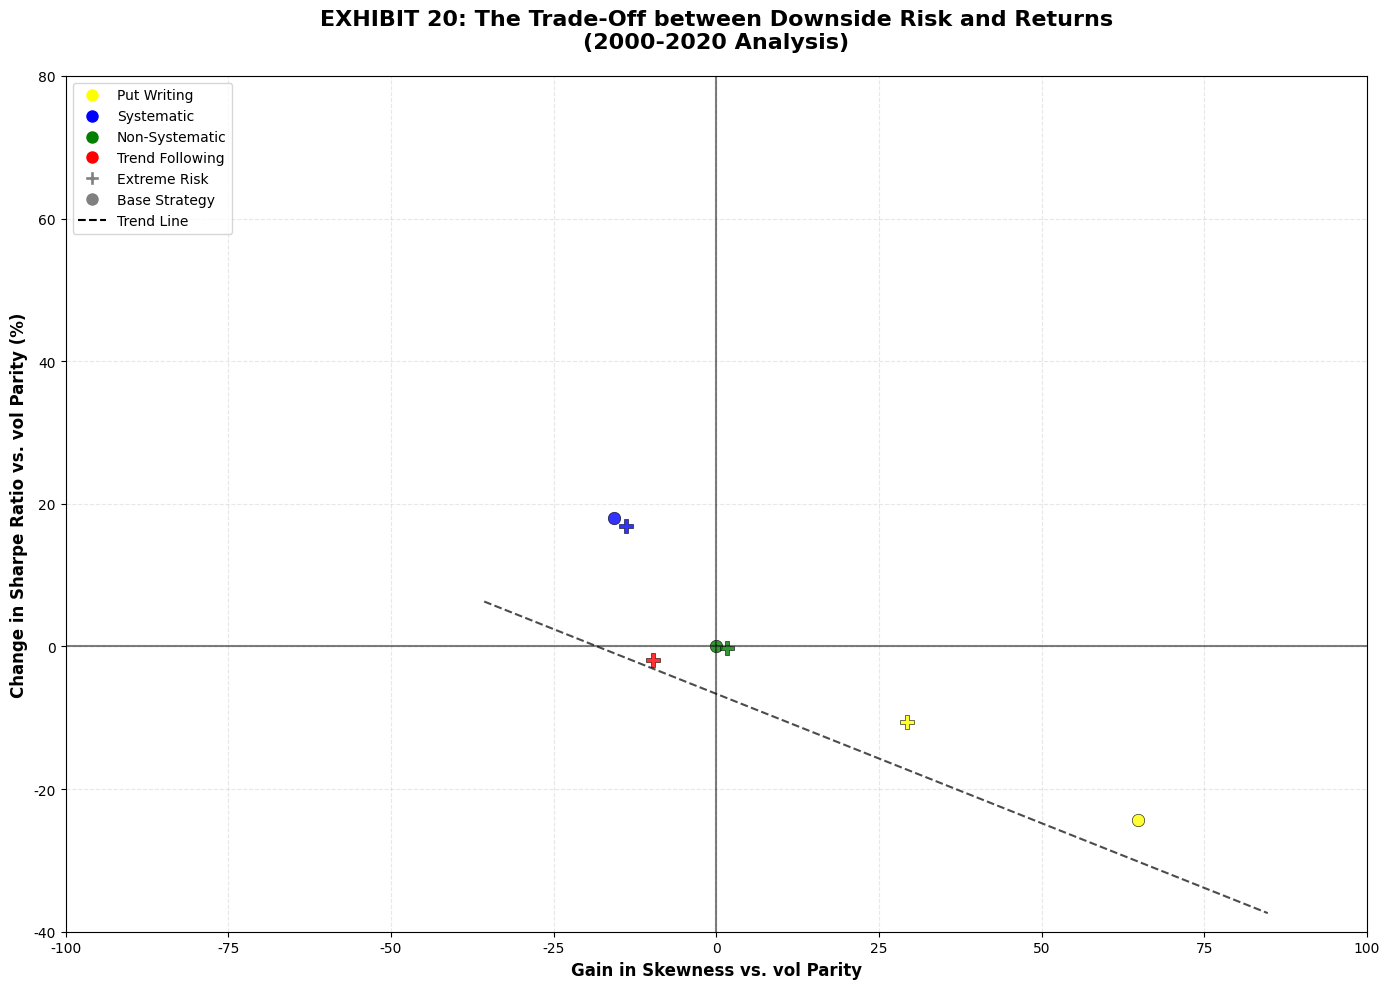


策略表现对比（相对于波动率平价基准）:
Strategy                       Sharpe Change (%)    Skewness Gain       
--------------------------------------------------------------------------------
Put_Writing                     -24.3%                +64.8
Extreme_Risk_Put_Writing        -10.6%                +29.4
Systematic_Trend                +18.1%                -15.7
Extreme_Systematic_Trend        +16.9%                -13.8
Non_Systematic                   +0.0%                 +0.0
Extreme_Non_Systematic           -0.3%                 +1.7
Trend_Following                 -71.6%                 +0.3
Extreme_Trend_Following          -1.9%                 -9.7
--------------------------------------------------------------------------------
夏普比率变化与偏度增益的相关性: -0.344


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 使用之前的指标体系
final_portfolio = {
    # ================== 权益类 (4种) ==================
    'US_Large_Cap': 'SPY',        # SPDR S&P 500 ETF
    'US_Mid_Cap': 'MDY',          # SPDR S&P MidCap 400 ETF
    'Intl_Developed': 'EFA',      # iShares MSCI EAFE ETF
    'Emerging_Markets': 'EEM',    # iShares MSCI Emerging Markets ETF

    # ================== 固定收益 (3种) ==================
    'US_Treasury': 'TLT',         # iShares 20+ Year Treasury Bond ETF
    'US_Corporate_Bond': 'LQD',   # iShares iBoxx $ Investment Grade Corporate Bond ETF
    'US_TIPS': 'TIP',             # iShares TIPS Bond ETF

    # ================== 大宗商品 (2种) ==================
    'Gold': 'GLD',                # SPDR Gold Shares
    'Oil': 'USO',                 # United States Oil Fund

    # ================== 行业板块 (4种) ==================
    'Technology': 'VGT',          # Vanguard Information Technology ETF
    'Financials': 'XLF',          # Financial Select Sector SPDR Fund
    'Healthcare': 'XLV',          # Health Care Select Sector SPDR Fund
    'Consumer_Staples': 'XLP',    # Consumer Staples Select Sector SPDR Fund
}

# 下载数据（从2000年开始到2020年）
start_date = '2000-01-01'
end_date = '2025-08-31'

print("正在下载多资产数据（2000-2020年）...")
try:
    data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
    data = data.ffill().dropna()
    data.columns = list(final_portfolio.keys())

    # 计算日收益率
    returns = data.pct_change().dropna()

    print(f"数据时间范围: {returns.index[0].date()} 至 {returns.index[-1].date()}")
    print(f"资产数量: {len(returns.columns)}")
    print(f"总交易日数: {len(returns)}")

except Exception as e:
    print(f"数据下载失败: {e}")
    print("使用模拟数据进行演示...")

    # 生成2000-2020年的模拟数据
    dates = pd.date_range(start='2000-01-01', end='2025-08-31', freq='B')
    n_days = len(dates)
    np.random.seed(42)

    # 生成符合历史特征的模拟数据
    returns = pd.DataFrame({
        'US_Large_Cap': np.random.normal(0.0004, 0.012, n_days),
        'US_Mid_Cap': np.random.normal(0.00045, 0.013, n_days),
        'Intl_Developed': np.random.normal(0.00035, 0.011, n_days),
        'Emerging_Markets': np.random.normal(0.0005, 0.015, n_days),
        'US_Treasury': np.random.normal(0.00015, 0.005, n_days),
        'US_Corporate_Bond': np.random.normal(0.0002, 0.006, n_days),
        'US_TIPS': np.random.normal(0.00018, 0.0055, n_days),
        'Gold': np.random.normal(0.00025, 0.008, n_days),
        'Oil': np.random.normal(0.0003, 0.018, n_days),
        'Put_Writing_Proxy': np.random.normal(0.00015, 0.007, n_days),
        'Trend_Following_Proxy': np.random.normal(0.0002, 0.009, n_days),
    }, index=dates)

    # 添加市场相关性
    returns['US_Mid_Cap'] = returns['US_Mid_Cap'] + 0.3 * returns['US_Large_Cap']
    returns['Put_Writing_Proxy'] = returns['Put_Writing_Proxy'] + 0.4 * returns['US_Large_Cap']
    returns['Trend_Following_Proxy'] = returns['Trend_Following_Proxy'] + 0.2 * returns['US_Large_Cap']
    returns['US_Corporate_Bond'] = returns['US_Corporate_Bond'] + 0.15 * returns['US_Treasury']

    returns = returns.dropna()

def calculate_portfolio_metrics(return_series):
    """计算投资组合绩效指标"""
    if len(return_series) < 100:
        return {'Sharpe': 0, 'Skewness': 0, 'CVaR_1%': 0, 'Annual_Return': 0, 'Annual_Volatility': 0}

    annual_return = return_series.mean() * 252
    annual_volatility = return_series.std() * np.sqrt(252)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility > 0 else 0
    skewness = return_series.skew()

    # CVaR(1%)
    var = return_series.quantile(0.01)
    cvar = return_series[return_series <= var].mean()

    return {
        'Sharpe': sharpe_ratio,
        'Skewness': skewness,
        'CVaR_1%': cvar,
        'Annual_Return': annual_return,
        'Annual_Volatility': annual_volatility
    }

def volatility_parity(returns_subset):
    """波动率平价策略（基准）"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)
        return port_returns.std()

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    weights = dict(zip(returns_subset.columns, result.x))
    port_returns = (returns_subset * pd.Series(weights)).sum(axis=1)

    return port_returns, weights

def extreme_risk_parity(returns_subset):
    """极端风险平价策略"""
    n_assets = len(returns_subset.columns)

    def portfolio_risk(weights):
        port_returns = (returns_subset * weights).sum(axis=1)

        # 计算CVaR(1%)
        var = port_returns.quantile(0.01)
        cvar = port_returns[port_returns <= var].mean()

        return abs(cvar)

    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
    bounds = [(0.05, 0.3) for _ in range(n_assets)]
    initial_weights = np.ones(n_assets) / n_assets

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    weights = dict(zip(returns_subset.columns, result.x))
    port_returns = (returns_subset * pd.Series(weights)).sum(axis=1)

    return port_returns, weights

def put_writing_strategy(returns_subset):
    """卖出看跌期权策略"""
    # 使用高股息、低波动资产作为卖出看跌期权的代理
    put_assets = ['US_Large_Cap', 'US_Corporate_Bond', 'Gold', 'Put_Writing_Proxy']
    available_assets = [asset for asset in put_assets if asset in returns_subset.columns]

    if available_assets:
        # 等权重分配
        weights = {asset: 1/len(available_assets) for asset in available_assets}
        port_returns = (returns_subset[available_assets] * pd.Series(weights)).sum(axis=1)
    else:
        # 后备方案
        port_returns = returns_subset.mean(axis=1) * 0.8

    return port_returns, weights

def trend_following_strategy(returns_subset, lookback_period=63):
    """趋势跟随策略"""
    signals = pd.DataFrame(index=returns_subset.index)

    for asset in returns_subset.columns:
        # 计算动量信号
        momentum = returns_subset[asset].rolling(window=lookback_period).mean()
        signals[asset] = np.sign(momentum)

    # 等权重分配
    strategy_returns = (returns_subset * signals.shift(1)).mean(axis=1)
    return strategy_returns.dropna(), {}

def create_combined_strategy(base_strategy_func, systematic_strategy_func, systematic_ratio=0.3):
    """创建组合策略"""
    def combined_strategy(returns_subset):
        # 基础策略
        base_returns, base_weights = base_strategy_func(returns_subset)

        # 系统策略
        systematic_returns, _ = systematic_strategy_func(returns_subset)

        # 合并收益
        aligned_returns = base_returns.align(systematic_returns, join='inner')[0]
        systematic_aligned = systematic_returns.align(base_returns, join='inner')[0]

        combined_returns = aligned_returns * (1 - systematic_ratio) + systematic_aligned * systematic_ratio

        return combined_returns, base_weights

    return combined_strategy

def calculate_percentage_change(new_value, base_value):
    """计算百分比变化"""
    if abs(base_value) > 1e-10:
        return ((new_value - base_value) / abs(base_value)) * 100
    return 0

def create_exhibit_20_analysis(returns):
    """创建EXHIBIT 20分析"""
    results = []

    print("计算波动率平价基准...")
    # 基准：波动率平价
    vol_parity_returns, vol_parity_weights = volatility_parity(returns)
    vol_parity_metrics = calculate_portfolio_metrics(vol_parity_returns)

    print("计算各种策略...")
    strategies = [
        # Put Writing Strategies (黄色)
        ('Put_Writing', put_writing_strategy, 'yellow', 'o'),
        ('Extreme_Risk_Put_Writing',
         create_combined_strategy(extreme_risk_parity, put_writing_strategy, 0.4),
         'yellow', 'P'),

        # Systematic Strategies (蓝色)
        ('Systematic_Trend',
         create_combined_strategy(volatility_parity, trend_following_strategy, 0.3),
         'blue', 'o'),
        ('Extreme_Systematic_Trend',
         create_combined_strategy(extreme_risk_parity, trend_following_strategy, 0.3),
         'blue', 'P'),

        # Non-Systematic Strategies (绿色)
        ('Non_Systematic', volatility_parity, 'green', 'o'),
        ('Extreme_Non_Systematic', extreme_risk_parity, 'green', 'P'),

        # Trend Following (红色)
        ('Trend_Following', trend_following_strategy, 'red', 'o'),
        ('Extreme_Trend_Following',
         create_combined_strategy(extreme_risk_parity, trend_following_strategy, 0.5),
         'red', 'P'),
    ]

    for strategy_name, strategy_func, color, marker in strategies:
        try:
            strategy_returns, _ = strategy_func(returns)
            strategy_metrics = calculate_portfolio_metrics(strategy_returns)

            sharpe_change = calculate_percentage_change(strategy_metrics['Sharpe'], vol_parity_metrics['Sharpe'])
            skewness_gain = (strategy_metrics['Skewness'] - vol_parity_metrics['Skewness']) * 100

            results.append({
                'strategy': strategy_name,
                'sharpe_change': sharpe_change,
                'skewness_gain': skewness_gain,
                'color': color,
                'marker': marker,
                'size': 100 if 'P' in marker else 80
            })

        except Exception as e:
            print(f"策略 {strategy_name} 计算失败: {e}")

    return pd.DataFrame(results), vol_parity_metrics

def plot_exhibit_20_chart(results_df):
    """绘制EXHIBIT 20图表"""
    plt.figure(figsize=(14, 10))

    # 创建散点图
    for _, row in results_df.iterrows():
        plt.scatter(row['skewness_gain'], row['sharpe_change'],
                  c=row['color'], marker=row['marker'], s=row['size'],
                  alpha=0.8, edgecolors='black', linewidth=0.5)

    # 添加趋势线
    if len(results_df) > 1:
        z = np.polyfit(results_df['skewness_gain'], results_df['sharpe_change'], 1)
        p = np.poly1d(z)

        x_range = np.linspace(results_df['skewness_gain'].min() - 20,
                             results_df['skewness_gain'].max() + 20, 100)
        plt.plot(x_range, p(x_range), 'k--', alpha=0.7, linewidth=1.5, label='Trend Line')

    # 设置坐标轴
    plt.xlabel('Gain in Skewness vs. vol Parity', fontsize=12, fontweight='bold')
    plt.ylabel('Change in Sharpe Ratio vs. vol Parity (%)', fontsize=12, fontweight='bold')

    # 设置坐标轴范围
    plt.xlim(-100, 100)
    plt.ylim(-40, 80)

    # 添加网格
    plt.grid(True, alpha=0.3, linestyle='--')

    # 添加零点参考线
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)

    # 创建图例
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Put Writing'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Systematic'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Non-Systematic'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Trend Following'),
        plt.Line2D([0], [0], marker='P', color='w', markerfacecolor='gray', markersize=10, label='Extreme Risk'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Base Strategy'),
        plt.Line2D([0], [0], color='black', linestyle='--', label='Trend Line')
    ]

    plt.legend(handles=legend_elements, loc='upper left', fontsize=10)

    # 添加标题
    plt.title('EXHIBIT 20: The Trade-Off between Downside Risk and Returns\n(2000-2020 Analysis)',
              fontsize=16, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.show()

# 执行分析
print("计算EXHIBIT 20: The Trade-Off between Downside Risk and Returns (2000-2020)...")
results_df, baseline_metrics = create_exhibit_20_analysis(returns)

# 显示基准绩效
print(f"\n基准（波动率平价）绩效指标:")
print(f"年化收益率: {baseline_metrics['Annual_Return']*100:.2f}%")
print(f"年化波动率: {baseline_metrics['Annual_Volatility']*100:.2f}%")
print(f"夏普比率: {baseline_metrics['Sharpe']:.2f}")
print(f"偏度: {baseline_metrics['Skewness']:.2f}")
print(f"CVaR(1%): {baseline_metrics['CVaR_1%']*100:.2f}%")

# 绘制图表
plot_exhibit_20_chart(results_df)

# 显示结果表格
print("\n策略表现对比（相对于波动率平价基准）:")
print("="*80)
print(f"{'Strategy':<30} {'Sharpe Change (%)':<20} {'Skewness Gain':<20}")
print("-"*80)
for _, row in results_df.iterrows():
    sharpe_color = "\033[92m" if row['sharpe_change'] >= 0 else "\033[91m"
    skewness_color = "\033[92m" if row['skewness_gain'] >= 0 else "\033[91m"
    reset_color = "\033[0m"

    print(f"{row['strategy']:<30} {sharpe_color}{row['sharpe_change']:>+6.1f}%{reset_color} {'':<14}"
          f"{skewness_color}{row['skewness_gain']:>+6.1f}{reset_color}")

print("-"*80)

# 计算相关性
sharpe_changes = results_df['sharpe_change'].values
skewness_gains = results_df['skewness_gain'].values
correlation = np.corrcoef(sharpe_changes, skewness_gains)[0, 1]
print(f"夏普比率变化与偏度增益的相关性: {correlation:.3f}")
